In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
np.random.seed(42)
random.seed(42)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1= pd.read_csv("Rail freight transport.csv")

In [3]:
df1.head()

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,LUX,Luxembourg,T-GOODS-RL-TOT,Rail freight transport,1981,1981,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,585.0,NaN,NaN
1,LUX,Luxembourg,T-GOODS-RL-TOT,Rail freight transport,1982,1982,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,550.0,NaN,NaN
2,LUX,Luxembourg,T-GOODS-RL-TOT,Rail freight transport,1983,1983,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,505.0,NaN,NaN
3,LUX,Luxembourg,T-GOODS-RL-TOT,Rail freight transport,1984,1984,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,584.0,NaN,NaN
4,LUX,Luxembourg,T-GOODS-RL-TOT,Rail freight transport,1985,1985,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,645.0,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                167 non-null    object 
 1   Country                167 non-null    object 
 2   VARIABLE               167 non-null    object 
 3   Variable               167 non-null    object 
 4   YEAR                   167 non-null    int64  
 5   Year                   167 non-null    int64  
 6   Unit Code              167 non-null    object 
 7   Unit                   167 non-null    object 
 8   PowerCode Code         167 non-null    int64  
 9   PowerCode              167 non-null    object 
 10  Reference Period Code  0 non-null      float64
 11  Reference Period       0 non-null      float64
 12  Value                  167 non-null    float64
 13  Flag Codes             0 non-null      float64
 14  Flags                  0 non-null      float64
dtypes: flo

In [5]:
df1.shape

(167, 15)

In [6]:
df1.describe()

,YEAR,Year,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,167.000000,167.000000,167.0,0.0,0.0,167.000000,0.0,0.0
mean,2001.377246,2001.377246,6.0,NaN,NaN,8187.729540,NaN,NaN
std,12.088836,12.088836,0.0,NaN,NaN,9383.227752,NaN,NaN
min,1981.000000,1981.000000,6.0,NaN,NaN,70.000000,NaN,NaN
25%,1991.000000,1991.000000,6.0,NaN,NaN,510.500000,NaN,NaN
50%,2001.000000,2001.000000,6.0,NaN,NaN,713.000000,NaN,NaN
75%,2012.000000,2012.000000,6.0,NaN,NaN,11117.500000,NaN,NaN
max,2022.000000,2022.000000,6.0,NaN,NaN,33806.000000,NaN,NaN


In [7]:
df1.isnull().sum()

COUNTRY                    0
Country                    0
VARIABLE                   0
Variable                   0
YEAR                       0
Year                       0
Unit Code                  0
Unit                       0
PowerCode Code             0
PowerCode                  0
Reference Period Code    167
Reference Period         167
Value                      0
Flag Codes               167
Flags                    167
dtype: int64

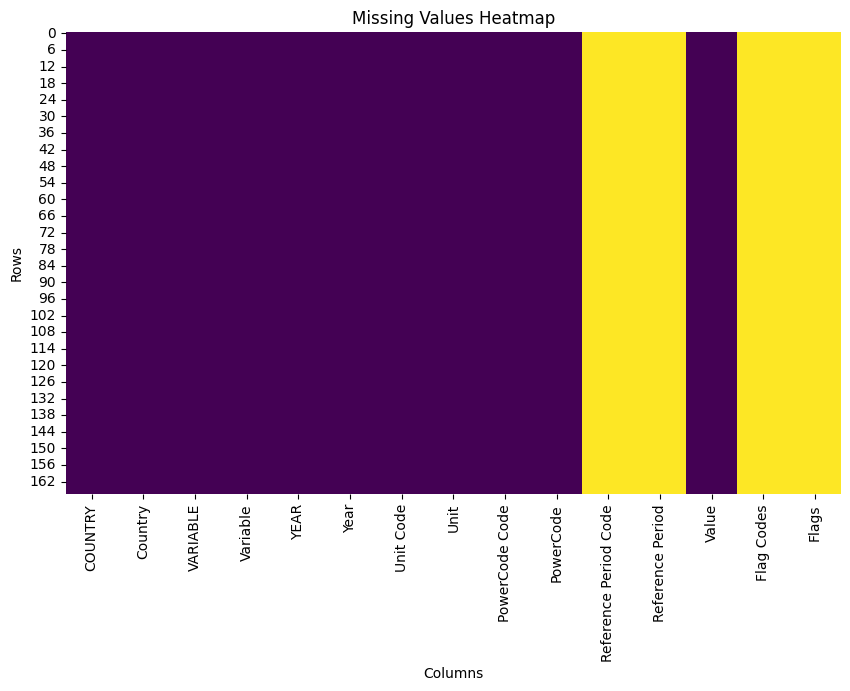

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [9]:
df1 = pd.DataFrame(df1)
column_names = df1.columns
print(column_names)

Index(['COUNTRY', 'Country', 'VARIABLE', 'Variable', 'YEAR', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')


In [10]:
df1 = df1[['Country','Year','Value']]
df1.rename(columns = {'Value':'Total rail freight transport(M)'},inplace = True)
df1

,Country,Year,Total rail freight transport(M)
0,Luxembourg,1981,585.0
1,Luxembourg,1982,550.0
2,Luxembourg,1983,505.0
3,Luxembourg,1984,584.0
4,Luxembourg,1985,645.0
...,...,...,...
162,Finland,2018,11175.0
163,Finland,2019,10270.0
164,Finland,2020,10138.0
165,Finland,2021,10749.0


In [11]:
year_counts = df1['Year'].value_counts().sort_index()
year_counts

Year
1981    4
1982    4
1983    4
1984    4
1985    4
1986    4
1987    4
1988    4
1989    4
1990    4
1991    4
1992    4
1993    4
1994    4
1995    4
1996    4
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    4
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    3
Name: count, dtype: int64

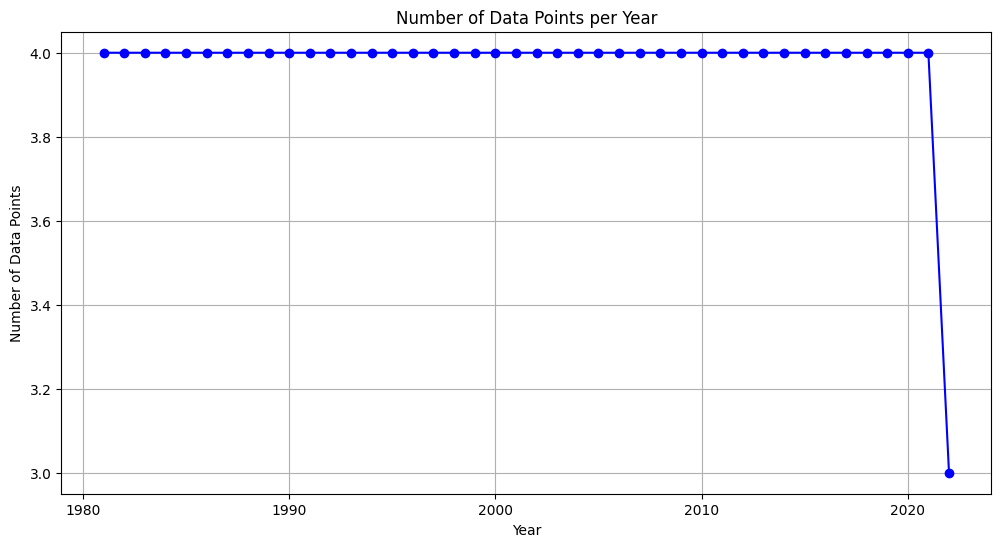

In [12]:
import matplotlib.pyplot as plt

# Extracting years and corresponding data point counts from year_counts
years = year_counts.index
counts = year_counts.values

# Creating a line plot
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='b')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.grid(True)

# Displaying the plot
plt.show()

In [13]:
# Create a complete year sequence
full_years = list(range(1981, 2023))

# Group the data by country and year, and calculate the number of data points for each group
grouped_data = df1.groupby(['Country', 'Year']).size().reset_index(name='Count')

# Iterate through each country, compare with the year sequence, and find missing years
for country in df1['Country'].unique():
    country_data = grouped_data[grouped_data['Country'] == country]
    missing_years = [year for year in full_years if year not in country_data['Year'].values]
    if missing_years:
        print(f"Missing years in {country}: {missing_years}")


Missing years in Japan: [2022]


In [14]:
import pmdarima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the time series data
df = df1.copy()
df.set_index("Year", inplace=True)

# Select a specific country
selected_country = 'Japan'
selected_data = df[df['Country'] == selected_country]['Total rail freight transport(M)']
 
    
# Use auto_arima to select the best ARIMA model order
stepwise_model = auto_arima(selected_data.loc[:'2018'], start_p=0, start_q=0,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print(stepwise_model.summary())


# Get the best order
best_order = (stepwise_model.order[0], stepwise_model.order[1], stepwise_model.order[2])

# Train the ARIMA model with the best order
model = sm.tsa.ARIMA(selected_data.loc[:'2019'], order=best_order)
results = model.fit()



# Predict data for the years 2020, 2021, and 2022
forecast_steps = 3
forecast = results.get_forecast(steps=forecast_steps)


# Extract predicted results and confidence intervals
forecast_mean = forecast.predicted_mean


# Calculate various forecast error metrics
actual_values = selected_data.loc['2019':'2021']

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_mean))
print(f'RMSE: {rmse}')

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_mean)
print(f'MSE: {mse}')

# R-squared
mean_actual = np.mean(actual_values)
sst = np.sum((actual_values - mean_actual) ** 2)
ssr = np.sum((forecast_mean - actual_values) ** 2)
rsquared = 1 - (ssr / sst)
print(f'R-squared: {rsquared}')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=442.922, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=445.967, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=445.599, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=444.352, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=444.132, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=443.234, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=445.674, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=444.731, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=440.209, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=442.410, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=441.999, Time=0.25 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=440.640, Time=0.09 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AI

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### In the ARIMA model, there are six parameters, and they represent the following:

p (Autoregressive Order): The autoregressive order in the ARIMA model indicates how many lagged values are considered as autoregressive terms in the model. A value of p = 2 means that the model includes autoregressive terms up to two lagged values.

d (Differencing Order): The differencing order represents how many times the time series needs to be differenced to make it stationary. A value of d = 1 indicates that the series has been differenced once.

q (Moving Average Order): The moving average order in the ARIMA model indicates how many lagged values are considered as moving average terms in the model. A value of q = 2 means that the model includes moving average terms up to two lagged values.

P (Seasonal Autoregressive Order): The seasonal autoregressive order represents how many lagged values within the seasonal cycle are considered as seasonal autoregressive terms in the model. A value of P = 0 indicates that there are no seasonal autoregressive terms.

D (Seasonal Differencing Order): The seasonal differencing order indicates how many times the seasonal component of the time series needs to be differenced to make it stationary. A value of D = 1 indicates that seasonal differencing has been performed once.

Q (Seasonal Moving Average Order): The seasonal moving average order represents how many lagged values within the seasonal cycle are considered as seasonal moving average terms in the model. A value of Q = 0 indicates that there are no seasonal moving average terms.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

class TimeSeriesForecaster:
    def __init__(self, data):
        self.data = data

    def forecast_data(self, selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city):
        # Convert the input year parameters to integer 
        train_start_year = int(train_start_year)
        train_end_year = int(train_end_year)
        # Extract data for the selected city in the specified time range
        selected_data = self.data[(self.data['Country'] == selected_city) & (self.data[time_column].astype(int) >= train_start_year) & (self.data[time_column].astype(int) <= train_end_year)][[time_column, selected_column]]

        # Set the time column as the index
        selected_data.set_index(time_column, inplace=True)
 

        # Use auto_arima to select the best ARIMA model order
        stepwise_model = auto_arima(selected_data[selected_column], start_p=0, start_q=0,
                                    max_p=3, max_q=3, m=12,
                                    start_P=0, seasonal=True,
                                    d=1, D=1, trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)

        print(stepwise_model.summary())

        # Get the best order
        best_order = (stepwise_model.order[0], stepwise_model.order[1], stepwise_model.order[2])

        # Train the ARIMA model with the best order
        model = sm.tsa.ARIMA(selected_data[selected_column], order=best_order)
        results = model.fit()
        

        # Forecast data for the specified number of steps
        forecast = results.get_forecast(steps=forecast_steps)

        # get the forecasted mean
        forecast_mean = forecast.predicted_mean

        return forecast_mean

# Create a TimeSeriesForecaster object 
forecaster = TimeSeriesForecaster(df1)
 
    
    
# Specify the column, time column, training years, forecast steps, and city
selected_column = 'Total rail freight transport(M)'
time_column = 'Year'
train_start_year = '1981'
train_end_year = '2021'
forecast_steps = 1
selected_city = 'Japan'

# Get the forecast result
forecast_result = forecaster.forecast_data(selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city)
# Print the result
print(f"Forecast result:\n{forecast_result}")


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=493.291, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=496.986, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=495.602, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=494.599, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=494.466, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=493.662, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=494.703, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=489.566, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=492.576, Time=0.09 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=491.263, Time=0.27 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=490.101, Time=0.11 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=in

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
new_data = {
    'Country': ["Japan"],
    'Year': [2022],
    'Total rail freight transport(M)': [18492.181041]
}

In [17]:
df1 = pd.concat([df1, pd.DataFrame(new_data)], ignore_index=True)

In [18]:
df1

,Country,Year,Total rail freight transport(M)
0,Luxembourg,1981,585.000000
1,Luxembourg,1982,550.000000
2,Luxembourg,1983,505.000000
3,Luxembourg,1984,584.000000
4,Luxembourg,1985,645.000000
...,...,...,...
163,Finland,2019,10270.000000
164,Finland,2020,10138.000000
165,Finland,2021,10749.000000
166,Finland,2022,8844.000000


In [19]:
df1 = df1[(df1['Year'] >= 1995) & (df1['Year'] <= 2022)]
df1.reset_index(drop = True,inplace = True)


In [20]:
df1

,Country,Year,Total rail freight transport(M)
0,Luxembourg,1995,529.000000
1,Luxembourg,1996,530.000000
2,Luxembourg,1997,566.000000
3,Luxembourg,1998,561.000000
4,Luxembourg,1999,609.000000
...,...,...,...
107,Finland,2019,10270.000000
108,Finland,2020,10138.000000
109,Finland,2021,10749.000000
110,Finland,2022,8844.000000


In [21]:
df2 = pd.read_csv("Rail passenger transport.csv")

In [22]:
df2.head()

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,JPN,Japan,T-PASS-RL-TOT,Rail passenger transport,1981,1981,PKM,Passenger-kilometres,6,Millions,NaN,NaN,316204,NaN,NaN
1,JPN,Japan,T-PASS-RL-TOT,Rail passenger transport,1982,1982,PKM,Passenger-kilometres,6,Millions,NaN,NaN,316347,NaN,NaN
2,JPN,Japan,T-PASS-RL-TOT,Rail passenger transport,1983,1983,PKM,Passenger-kilometres,6,Millions,NaN,NaN,321452,NaN,NaN
3,JPN,Japan,T-PASS-RL-TOT,Rail passenger transport,1984,1984,PKM,Passenger-kilometres,6,Millions,NaN,NaN,324136,NaN,NaN
4,JPN,Japan,T-PASS-RL-TOT,Rail passenger transport,1985,1985,PKM,Passenger-kilometres,6,Millions,NaN,NaN,330102,NaN,NaN


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                167 non-null    object 
 1   Country                167 non-null    object 
 2   VARIABLE               167 non-null    object 
 3   Variable               167 non-null    object 
 4   YEAR                   167 non-null    int64  
 5   Year                   167 non-null    int64  
 6   Unit Code              167 non-null    object 
 7   Unit                   167 non-null    object 
 8   PowerCode Code         167 non-null    int64  
 9   PowerCode              167 non-null    object 
 10  Reference Period Code  0 non-null      float64
 11  Reference Period       0 non-null      float64
 12  Value                  167 non-null    int64  
 13  Flag Codes             1 non-null      object 
 14  Flags                  1 non-null      object 
dtypes: flo

In [24]:
df2.shape

(167, 15)

In [25]:
df2.describe()

,YEAR,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,167.000000,167.000000,167.0,0.0,0.0,167.000000
mean,2001.377246,2001.377246,6.0,NaN,NaN,94985.628743
std,12.088836,12.088836,0.0,NaN,NaN,165115.434915
min,1981.000000,1981.000000,6.0,NaN,NaN,208.000000
25%,1991.000000,1991.000000,6.0,NaN,NaN,648.500000
50%,2001.000000,2001.000000,6.0,NaN,NaN,2399.000000
75%,2012.000000,2012.000000,6.0,NaN,NaN,4748.000000
max,2022.000000,2022.000000,6.0,NaN,NaN,441614.000000


In [26]:
df2.isnull().sum()

COUNTRY                    0
Country                    0
VARIABLE                   0
Variable                   0
YEAR                       0
Year                       0
Unit Code                  0
Unit                       0
PowerCode Code             0
PowerCode                  0
Reference Period Code    167
Reference Period         167
Value                      0
Flag Codes               166
Flags                    166
dtype: int64

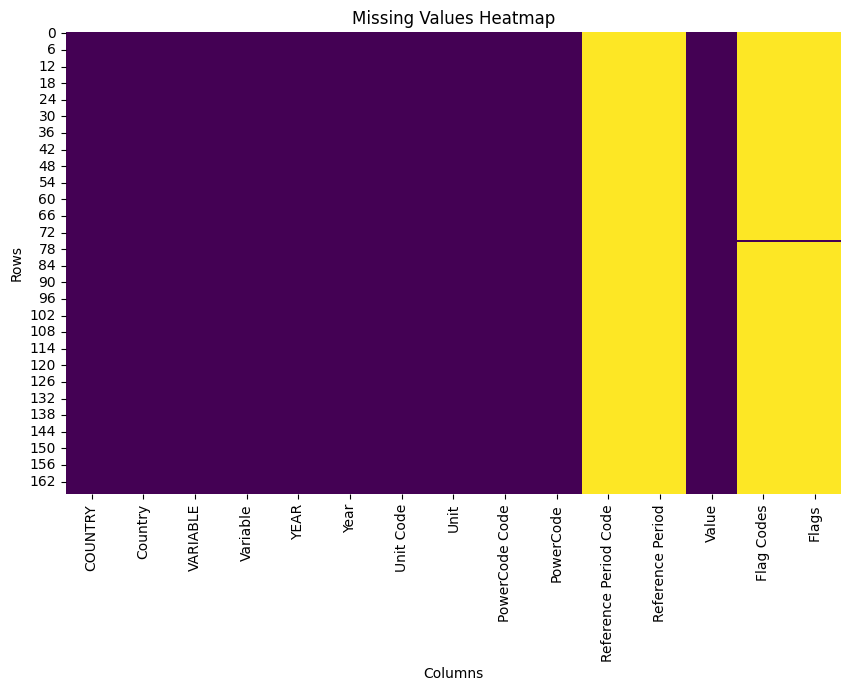

In [27]:

plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [28]:
df2 = df2[["Country","Year","Value"]]
df2.rename(columns = {"Value":"Rail passenger transport(M)"},inplace = True)
df2

,Country,Year,Rail passenger transport(M)
0,Japan,1981,316204
1,Japan,1982,316347
2,Japan,1983,321452
3,Japan,1984,324136
4,Japan,1985,330102
...,...,...,...
162,Luxembourg,2018,442
163,Luxembourg,2019,463
164,Luxembourg,2020,269
165,Luxembourg,2021,304


In [29]:
year_counts = df2['Year'].value_counts().sort_index()
year_counts

Year
1981    4
1982    4
1983    4
1984    4
1985    4
1986    4
1987    4
1988    4
1989    4
1990    4
1991    4
1992    4
1993    4
1994    4
1995    4
1996    4
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    4
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    3
Name: count, dtype: int64

In [30]:
# Extracting years and corresponding data point counts from year_counts
years = year_counts.index
counts = year_counts.values

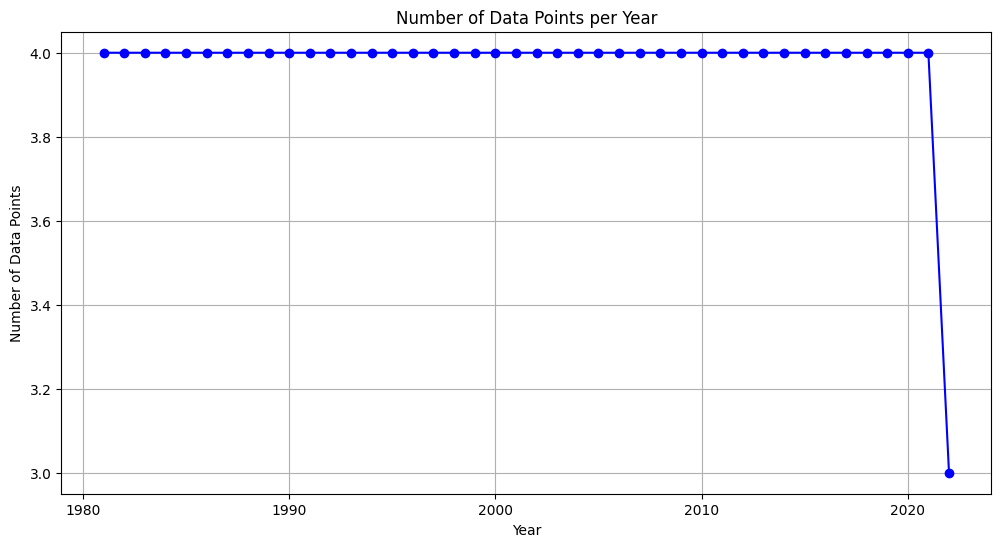

In [31]:
# Creating a line plot
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='b')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.grid(True)
# displaying the plot
plt.show()

In [32]:
# Create a complete year sequence
full_years = list(range(1981, 2023))
# group the data by country and year, and calculate the count of data points for each group
grouped_data = df2.groupby(['Country', 'Year']).size().reset_index(name='Count')



# Iterate through each country, and find missing years
for country in df2['Country'].unique():
    country_data = grouped_data[grouped_data['Country'] == country]
    missing_years = [year for year in full_years if year not in country_data['Year'].values]
    if missing_years:
        print(f"Missing years in {country}: {missing_years}")


Missing years in Japan: [2022]


In [33]:
df2

,Country,Year,Rail passenger transport(M)
0,Japan,1981,316204
1,Japan,1982,316347
2,Japan,1983,321452
3,Japan,1984,324136
4,Japan,1985,330102
...,...,...,...
162,Luxembourg,2018,442
163,Luxembourg,2019,463
164,Luxembourg,2020,269
165,Luxembourg,2021,304


In [34]:
# greate a TimeSeriesForecaster object and pass the DataFrame to it
forecaster = TimeSeriesForecaster(df2)
# Specify the column, time column, training period, forecast steps, and city
selected_column = 'Rail passenger transport(M)'
time_column = 'Year'
train_start_year = '1981'
train_end_year = '2021'
forecast_steps = 1
selected_city = 'Japan'


# Get the forecast result
forecast_result = forecaster.forecast_data(selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city)

# Print the forecast result
print(f"Forecast result:\n{forecast_result}")


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=668.237, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=667.525, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=670.179, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=670.441, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=671.312, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=670.193, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=668.263, Time=0.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=668.519, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=670.412, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=667.127, Time=0.01 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=668.876, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=668.852, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=670.829, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=669.029, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12] intercep

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
new_data = {
    'Country': ["Japan"],
    'Year': [2022],
    'Rail passenger transport(M)': [18492.181041]
}

In [36]:
df2 = pd.concat([df2, pd.DataFrame(new_data)], ignore_index=True)

In [37]:
df2

,Country,Year,Rail passenger transport(M)
0,Japan,1981,316204.000000
1,Japan,1982,316347.000000
2,Japan,1983,321452.000000
3,Japan,1984,324136.000000
4,Japan,1985,330102.000000
...,...,...,...
163,Luxembourg,2019,463.000000
164,Luxembourg,2020,269.000000
165,Luxembourg,2021,304.000000
166,Luxembourg,2022,389.000000


In [38]:
df2 = df2[(df2['Year'] >= 1995) & (df2['Year'] <= 2022)]
df2.reset_index(drop = True,inplace = True)


In [39]:
df2

,Country,Year,Rail passenger transport(M)
0,Japan,1995,400084.000000
1,Japan,1996,402156.000000
2,Japan,1997,395278.000000
3,Japan,1998,388917.000000
4,Japan,1999,385098.000000
...,...,...,...
107,Luxembourg,2019,463.000000
108,Luxembourg,2020,269.000000
109,Luxembourg,2021,304.000000
110,Luxembourg,2022,389.000000


In [40]:
df3 = pd.read_csv("Rail infrastructure investment.csv")

In [41]:
df3.head()

,COUNTRY,Country,VARIABLE,Variable,MEASURE,Measure,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,FIN,Finland,I-INV-RL,Rail infrastructure investment,EUR,Euro,1995,1995,EUR,Euro,0,Units,NaN,NaN,226000000.0,NaN,NaN
1,FIN,Finland,I-INV-RL,Rail infrastructure investment,EUR,Euro,1996,1996,EUR,Euro,0,Units,NaN,NaN,192000000.0,NaN,NaN
2,FIN,Finland,I-INV-RL,Rail infrastructure investment,EUR,Euro,1997,1997,EUR,Euro,0,Units,NaN,NaN,224000000.0,NaN,NaN
3,FIN,Finland,I-INV-RL,Rail infrastructure investment,EUR,Euro,1998,1998,EUR,Euro,0,Units,NaN,NaN,254000000.0,NaN,NaN
4,FIN,Finland,I-INV-RL,Rail infrastructure investment,EUR,Euro,1999,1999,EUR,Euro,0,Units,NaN,NaN,264000000.0,NaN,NaN


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                105 non-null    object 
 1   Country                105 non-null    object 
 2   VARIABLE               105 non-null    object 
 3   Variable               105 non-null    object 
 4   MEASURE                105 non-null    object 
 5   Measure                105 non-null    object 
 6   YEAR                   105 non-null    int64  
 7   Year                   105 non-null    int64  
 8   Unit Code              105 non-null    object 
 9   Unit                   105 non-null    object 
 10  PowerCode Code         105 non-null    int64  
 11  PowerCode              105 non-null    object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  105 non-null    float64
 15  Flag C

In [43]:
df3.shape

(105, 17)

In [44]:
df3.describe()

,YEAR,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,105.000000,105.000000,105.0,0.0,0.0,1.050000e+02
mean,2007.628571,2007.628571,0.0,NaN,NaN,2.537526e+09
std,7.614835,7.614835,0.0,NaN,NaN,4.339945e+09
min,1995.000000,1995.000000,0.0,NaN,NaN,2.000000e+06
25%,2001.000000,2001.000000,0.0,NaN,NaN,1.265270e+08
50%,2008.000000,2008.000000,0.0,NaN,NaN,2.450054e+08
75%,2014.000000,2014.000000,0.0,NaN,NaN,1.560069e+09
max,2021.000000,2021.000000,0.0,NaN,NaN,1.755989e+10


In [45]:
df3.isnull().sum()

COUNTRY                    0
Country                    0
VARIABLE                   0
Variable                   0
MEASURE                    0
Measure                    0
YEAR                       0
Year                       0
Unit Code                  0
Unit                       0
PowerCode Code             0
PowerCode                  0
Reference Period Code    105
Reference Period         105
Value                      0
Flag Codes               104
Flags                    104
dtype: int64

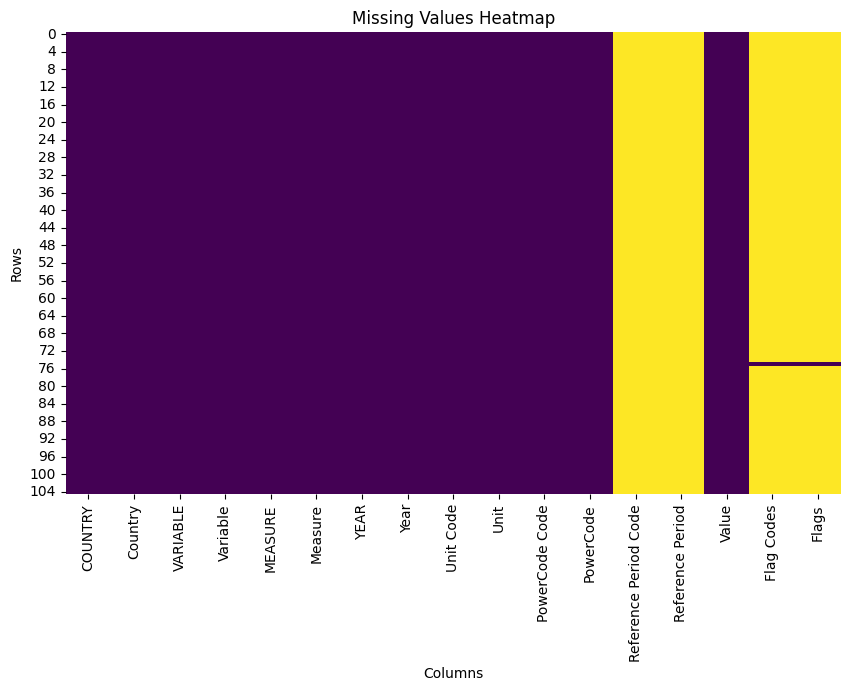

In [46]:

plt.figure(figsize=(10, 6))
sns.heatmap(df3.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [47]:
df3 = df3[["Country","Year","Value"]]
df3.rename(columns = {"Value":"Rail infrastructure investment(Euro)"},inplace = True)
df3

,Country,Year,Rail infrastructure investment(Euro)
0,Finland,1995,226000000.0
1,Finland,1996,192000000.0
2,Finland,1997,224000000.0
3,Finland,1998,254000000.0
4,Finland,1999,264000000.0
...,...,...,...
100,Luxembourg,2016,317180624.0
101,Luxembourg,2017,289998924.0
102,Luxembourg,2018,263917942.0
103,Luxembourg,2019,235449619.0


In [48]:
year_counts = df3['Year'].value_counts().sort_index()
year_counts

Year
1995    4
1996    4
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    4
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    1
Name: count, dtype: int64

In [49]:

years = year_counts.index
counts = year_counts.values

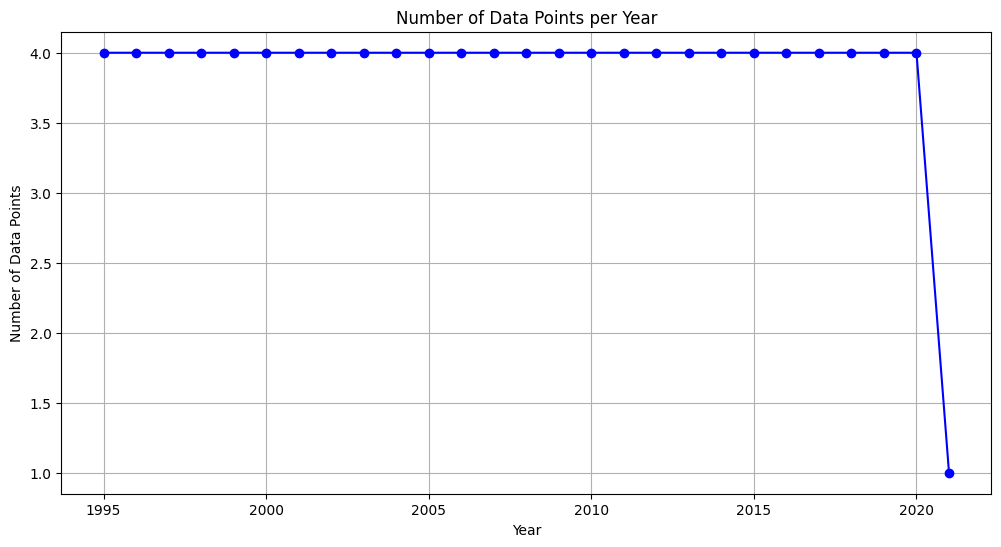

In [50]:
# Creating a line plot
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='b')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.grid(True)
# Displaying the plot
plt.show()

In [51]:
## Create a TimeSeriesForecaster object and pass the DataFrame to it
forecaster = TimeSeriesForecaster(df2)
# Specify the column, time column, training period and city
selected_column = 'Rail passenger transport(M)'
time_column = 'Year'
train_start_year = '1981'
train_end_year = '2021'
forecast_steps = 1
selected_city = 'Japan'


# get the forecast result
forecast_result = forecaster.forecast_data(selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city)
# Print the forecast result
print(f"Forecast result:\n{forecast_result}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=345.037, Time=0.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=343.686, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=346.955, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=347.622, Time=0.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=357.728, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=347.037, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=345.128, Time=0.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=345.755, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=347.749, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=344.726, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.274 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   27
Model:             SARIMAX(0, 1, 0)x(

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [52]:
# Create a TimeSeriesForecaster object and pass the DataFrame to it
forecaster = TimeSeriesForecaster(df3)


# specify the column, time column, training period, forecast steps, and city
selected_column = 'Rail infrastructure investment(Euro)'
time_column = 'Year'
train_start_year = '1995'
train_end_year = '2021'
forecast_steps = 1
selected_city = 'Finland'

# Get the forecast result
forecast_result = forecaster.forecast_data(selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city)
# Print the forecast result
print(f"Forecast result:\n{forecast_result}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=557.512, Time=0.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=559.412, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=559.116, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=558.630, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=558.977, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=558.170, Time=0.02 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=560.970, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=559.045, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=558.433, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=558.930, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 0.570 seconds
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observ

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [53]:
# Create a TimeSeriesForecaster object and pass the DataFrame to it
forecaster = TimeSeriesForecaster(df3)
# Specify the column, time column, training period, forecast steps, and city
selected_column = 'Rail infrastructure investment(Euro)'
time_column = 'Year'
train_start_year = '1995'
train_end_year = '2020'
forecast_steps = 2
selected_city = 'Ireland'

# Get the forecast result
forecast_result = forecaster.forecast_data(selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city)
# Print the forecast result
print(f"Forecast result:\n{forecast_result}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=565.822, Time=0.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=568.122, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=561.081, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=559.081, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=561.081, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=563.077, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=560.993, Time=0.09 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=563.359, Time=0.01 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=562.888, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.620 seconds
                                      SARIMAX Results                                      
Dep. Va

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [54]:
selected_column = 'Rail infrastructure investment(Euro)'
time_column = 'Year'
train_start_year = '1995'
train_end_year = '2020'
forecast_steps = 2
selected_city = 'Japan'

# Get the forecast result
forecast_result = forecaster.forecast_data(selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city)
# print the forecast result
print(f"预测结果:\n{forecast_result}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=596.663, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=602.793, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=599.236, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=598.352, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=598.529, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=598.349, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=597.186, Time=0.03 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=600.302, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=599.092, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=600.209, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=598.756, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 0.569 seconds
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Ob

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
selected_column = 'Rail infrastructure investment(Euro)'
time_column = 'Year'
train_start_year = '1995'
train_end_year = '2020'
forecast_steps = 2
selected_city = 'Luxembourg'


forecast_result = forecaster.forecast_data(selected_column, time_column, train_start_year, train_end_year, forecast_steps, selected_city)

print(f"Forcast_result:\n{forecast_result}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=503.206, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=511.711, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=503.693, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=503.574, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=502.414, Time=0.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=504.243, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=505.685, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=498.014, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=509.336, Time=0.01 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=499.886, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=499.893, Time=0.09 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=501.886, Time=0.26 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AI

C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\luozh\anaconda3\envs\Python3-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
new_data = {
    'Country': ['Finland',"Ireland","Ireland","Japan","Japan","Luxembourg","Luxembourg"],
    'Year': [2022,2021,2022,2021,2022,2021,2022],
    'Rail infrastructure investment(Euro)': [606000000.0,1.695783e+08,1.695783e+08,1.701974e+10,1.701974e+10,2.650807e+08,2.624219e+08]
}

In [57]:
df3 = pd.concat([df3, pd.DataFrame(new_data)], ignore_index=True)

In [58]:
df3

,Country,Year,Rail infrastructure investment(Euro)
0,Finland,1995,2.260000e+08
1,Finland,1996,1.920000e+08
2,Finland,1997,2.240000e+08
3,Finland,1998,2.540000e+08
4,Finland,1999,2.640000e+08
...,...,...,...
107,Ireland,2022,1.695783e+08
108,Japan,2021,1.701974e+10
109,Japan,2022,1.701974e+10
110,Luxembourg,2021,2.650807e+08


In [59]:
sheet1 = pd.read_excel("World_population.xlsx",sheet_name = 0)

In [60]:
sheet1.shape

(20612, 65)

In [61]:
sheet1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
sheet1.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
count,20597,20597,20597,5476,20606,17065,16993,20305,20597,20597,...,20597,20597,20597,20597,20597,20597,20597,20597,20598,20597
unique,20597,2,290,47,300,238,237,281,10,36,...,19967,19894,19576,19531,19192,19849,19826,19683,15840,12812
top,Index,Estimates,Australia/New Zealand,2,634,UKR,UA,419,Country/Area,915,...,...,...,...,...,...,...,...,...,0,0
freq,1,20596,144,792,72,72,72,144,17064,2016,...,76,76,76,76,76,76,76,76,578,578


In [63]:
sheet1.isnull().sum()

Unnamed: 0        15
Unnamed: 1        15
Unnamed: 2        15
Unnamed: 3     15136
Unnamed: 4         6
               ...  
Unnamed: 60       15
Unnamed: 61       15
Unnamed: 62       15
Unnamed: 63       14
Unnamed: 64       15
Length: 65, dtype: int64

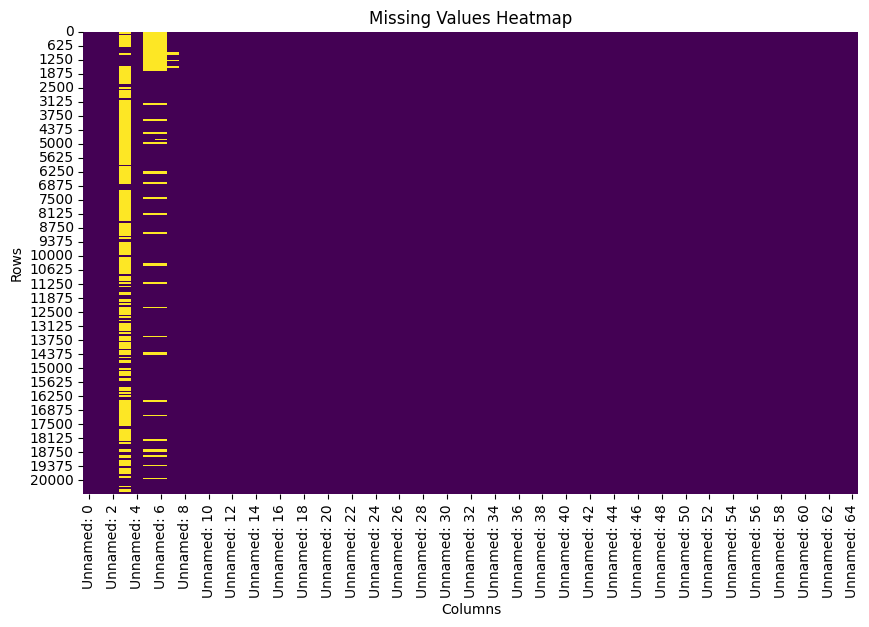

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(sheet1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [65]:
# prints the content of the first 20 rows to understand the dataset.
for index, row in sheet1.head(20).iterrows():
    print(f"number of column: {index + 1}, data: {list(row)}")

number of column: 1, data: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
number of column: 2, data: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
number of column: 3, data: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [66]:
columns = list(sheet1.iloc[15])
columns

['Index',
 'Variant',
 'Region, subregion, country or area *',
 'Notes',
 'Location code',
 'ISO3 Alpha-code',
 'ISO2 Alpha-code',
 'SDMX code**',
 'Type',
 'Parent code',
 'Year',
 'Total Population, as of 1 January (thousands)',
 'Total Population, as of 1 July (thousands)',
 'Male Population, as of 1 July (thousands)',
 'Female Population, as of 1 July (thousands)',
 'Population Density, as of 1 July (persons per square km)',
 'Population Sex Ratio, as of 1 July (males per 100 females)',
 'Median Age, as of 1 July (years)',
 'Natural Change, Births minus Deaths (thousands)',
 'Rate of Natural Change (per 1,000 population)',
 'Population Change (thousands)',
 'Population Growth Rate (percentage)',
 'Population Annual Doubling Time (years)',
 'Births (thousands)',
 'Births by women aged 15 to 19 (thousands)',
 'Crude Birth Rate (births per 1,000 population)',
 'Total Fertility Rate (live births per woman)',
 'Net Reproduction Rate (surviving daughters per woman)',
 'Mean Age Childbear

In [67]:
"""
my_list = columns

# Define target values to search for in the list
target_values = ['Region, subregion, country or area *', 'Year', 'Total Population, as of 1 January (thousands)']

# Initialize a dictionary to store the indices of each target value
value_indices = {}

# Iterate through the target values and find their indices in 'my_list'
for value in target_values:
    try:
        index = my_list.index(value)
        value_indices[value] = index
    except ValueError:
        # Take the exception if the value is not found in the list
        value_indices[value] = None

        
# Print the indices of each value
for value, index in value_indices.items():
    if index is not None:
        print(f"Index of '{value}': {index}")
    else:
        print(f"'{value}' not found")

# Filter rows in 'sheet1' where the value in the 3rd column is "Ireland"
matching_rows = sheet1[sheet1.iloc[:, 2] == "Ireland"]
print(matching_rows)
# Extract data from columns 3, 11, and 12 of 'matching_rows' and store them in separate lists
column_3_data = list(matching_rows.iloc[:, 2])
column_11_data = list(matching_rows.iloc[:, 10])
column_12_data = list(matching_rows.iloc[:, 11])
# Print the data from columns 3, 11, and 12
print("Data from column 3:", column_3_data)
print("Data from column 11:", column_11_data)
print("Data from column 12:", column_12_data)
# Create a DataFrame 'Ireland_population' with the extracted data
Ireland_population = pd.DataFrame(
    {
        "Year": column_11_data,
        "Ireland_population(thousands)": column_12_data
    }
)
"""

'\nmy_list = columns\n\n# Define target values to search for in the list\ntarget_values = [\'Region, subregion, country or area *\', \'Year\', \'Total Population, as of 1 January (thousands)\']\n\n# Initialize a dictionary to store the indices of each target value\nvalue_indices = {}\n\n# Iterate through the target values and find their indices in \'my_list\'\nfor value in target_values:\n    try:\n        index = my_list.index(value)\n        value_indices[value] = index\n    except ValueError:\n        # Take the exception if the value is not found in the list\n        value_indices[value] = None\n\n        \n# Print the indices of each value\nfor value, index in value_indices.items():\n    if index is not None:\n        print(f"Index of \'{value}\': {index}")\n    else:\n        print(f"\'{value}\' not found")\n\n# Filter rows in \'sheet1\' where the value in the 3rd column is "Ireland"\nmatching_rows = sheet1[sheet1.iloc[:, 2] == "Ireland"]\nprint(matching_rows)\n# Extract data fro

In [68]:
# Initialize 'my_list'
my_list = columns
# Define target values to search for
target_values = ['Region, subregion, country or area *', 'Year', 'Total Population, as of 1 January (thousands)']

# Initialize a dictionary to store the indices of each value
value_indices = {}

# Iterate through the target values and find their indices in 'my_list'
for value in target_values:
    try:
        index = my_list.index(value)
        value_indices[value] = index
    except ValueError:
        # Handle the exception if the value is not found in the list
        value_indices[value] = None

        
# Print the indices of each value
for value, index in value_indices.items():
    if index is not None:
        print(f"Index of '{value}': {index}")
    else:
        print(f"'{value}' not found")


Index of 'Region, subregion, country or area *': 2
Index of 'Year': 10
Index of 'Total Population, as of 1 January (thousands)': 11


In [69]:
import pandas as pd
# 
class SearchPopulationData:
    def __init__(self, sheet, country_name):
        self.sheet = sheet
        self.country_name = country_name
    def filter_data_by_country(self):
        matching_rows = self.sheet[self.sheet.iloc[:, 2] == self.country_name]
    
        column_11_data = list(matching_rows.iloc[:, 10])
        column_12_data = list(matching_rows.iloc[:, 11])

        return  column_11_data, column_12_data

    def create_population_dataframe(self):
        column_11_data, column_12_data = self.filter_data_by_country()

        population = pd.DataFrame(
            {
                "Year": column_11_data,
                f"{self.country_name}_population(thousands)": column_12_data
          }
        )

        return population

### Create a custom class to search for data related to specific countries

In [70]:
country_name = "Finland"

Finland_population_data1 = SearchPopulationData(sheet1, country_name).create_population_dataframe()
print(f"{country_name} Population Data1:")
print(Finland_population_data1)

country_name = "Ireland"

Ireland_population_data1 = SearchPopulationData(sheet1, country_name).create_population_dataframe()
print(f"{country_name} Population Data1:")
print(Ireland_population_data1)

country_name = "Japan"

Japan_population_data1 = SearchPopulationData(sheet1, country_name).create_population_dataframe()
print(f"{country_name} Population Data1:")
print(Japan_population_data1)

country_name = "Luxembourg"

Luxembourg_population_data1 = SearchPopulationData(sheet1, country_name).create_population_dataframe()
print(f"{country_name} Population Data1:")
print(Luxembourg_population_data1)

Finland Population Data1:
    Year  Finland_population(thousands)
0   1950                       3986.630
1   1951                       4029.947
2   1952                       4065.031
3   1953                       4116.525
4   1954                       4163.020
..   ...                            ...
67  2017                       5503.215
68  2018                       5513.064
69  2019                       5517.858
70  2020                       5525.215
71  2021                       5533.721

[72 rows x 2 columns]
Ireland Population Data1:
    Year  Ireland_population(thousands)
0   1950                       2898.772
1   1951                       2914.427
2   1952                       2934.983
3   1953                       2923.775
4   1954                       2910.300
..   ...                            ...
67  2017                       4741.657
68  2018                       4802.050
69  2019                       4866.964
70  2020                       4925.074
71  2

In [71]:
sheet2= pd.read_excel("World_population.xlsx",sheet_name = 1)

In [72]:
sheet2.shape

(22614, 65)

In [73]:
sheet2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
for index, row in sheet1.head(20).iterrows():
    print(f"number of column: {index + 1}, data: {list(row)}")
    

number of column: 1, data: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
number of column: 2, data: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
number of column: 3, data: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [75]:
country_name = "Finland"

Finland_population_data2 = SearchPopulationData(sheet2, country_name).create_population_dataframe()
print(f"{country_name} Population Data2:")
print(Finland_population_data2)

country_name = "Ireland"

Ireland_population_data2 = SearchPopulationData(sheet2, country_name).create_population_dataframe()
print(f"{country_name} Population Data2:")
print(Ireland_population_data2)

country_name = "Japan"

Japan_population_data2 = SearchPopulationData(sheet2, country_name).create_population_dataframe()
print(f"{country_name} Population Data2:")
print(Japan_population_data2)

country_name = "Luxembourg"

Luxembourg_population_data2 = SearchPopulationData(sheet2, country_name).create_population_dataframe()
print(f"{country_name} Population Data2:")
print(Luxembourg_population_data2)

Finland Population Data2:
    Year  Finland_population(thousands)
0   2022                       5538.263
1   2023                       5543.228
2   2024                       5547.721
3   2025                       5552.051
4   2026                       5555.920
..   ...                            ...
74  2096                       5063.361
75  2097                       5054.458
76  2098                       5045.590
77  2099                       5036.779
78  2100                       5028.228

[79 rows x 2 columns]
Ireland Population Data2:
    Year  Ireland_population(thousands)
0   2022                       5005.888
1   2023                       5040.329
2   2024                       5073.540
3   2025                       5105.416
4   2026                       5136.318
..   ...                            ...
74  2096                       5749.030
75  2097                       5743.798
76  2098                       5738.162
77  2099                       5732.147
78  2

In [76]:
Finland_population_data= pd.concat([Finland_population_data1,Finland_population_data2],axis = 0)

Finland_population_data.reset_index(drop = True,inplace = True)

Finland_population_data["Country"] = "Finland"

index_value1 = Finland_population_data[Finland_population_data['Year'] == 1995].index.tolist()
index_value2 = Finland_population_data[Finland_population_data['Year'] == 2022].index.tolist()

Finland_population_data

Finland_population_data = Finland_population_data.iloc[index_value1[0]:index_value2[0]+1]

Finland_population_data.rename(columns = {"Finland_population(thousands)":"population(thousands)"},inplace = True)

In [77]:
Ireland_population_data= pd.concat([Ireland_population_data1,Ireland_population_data2],axis = 0)

Ireland_population_data.reset_index(drop = True,inplace = True)

Ireland_population_data["Country"] = "Ireland"

index_value1 = Ireland_population_data[Ireland_population_data['Year'] == 1995].index.tolist()
index_value2 = Ireland_population_data[Ireland_population_data['Year'] == 2022].index.tolist()


Ireland_population_data = Ireland_population_data.iloc[index_value1[0]:index_value2[0]+1]

Ireland_population_data.rename(columns = {"Ireland_population(thousands)":"population(thousands)"},inplace = True)

In [78]:
Japan_population_data= pd.concat([Japan_population_data1,Japan_population_data2],axis = 0)

Japan_population_data.reset_index(drop = True,inplace = True)

Japan_population_data["Country"] = "Japan"

index_value1 = Japan_population_data[Japan_population_data['Year'] == 1995].index.tolist()
index_value2 = Japan_population_data[Japan_population_data['Year'] == 2022].index.tolist()


Japan_population_data = Japan_population_data.iloc[index_value1[0]:index_value2[0]+1]

Japan_population_data.rename(columns = {"Japan_population(thousands)":"population(thousands)"},inplace = True)

In [79]:
Japan_population_data

,Year,population(thousands),Country
45,1995,125299.854,Japan
46,1996,125568.083,Japan
47,1997,125884.363,Japan
48,1998,126171.606,Japan
49,1999,126445.174,Japan
50,2000,126664.952,Japan
51,2001,126942.770,Japan
52,2002,127188.691,Japan
53,2003,127414.810,Japan
54,2004,127589.895,Japan


In [80]:
Luxembourg_population_data= pd.concat([Luxembourg_population_data1,Luxembourg_population_data2],axis = 0)

Luxembourg_population_data.reset_index(drop = True,inplace = True)

Luxembourg_population_data["Country"] = "Luxembourg"

index_value1 = Luxembourg_population_data[Luxembourg_population_data['Year'] == 1995].index.tolist()
index_value2 = Luxembourg_population_data[Luxembourg_population_data['Year'] == 2022].index.tolist()


Luxembourg_population_data = Luxembourg_population_data.iloc[index_value1[0]:index_value2[0]+1]

Luxembourg_population_data.rename(columns = {"Luxembourg_population(thousands)":"population(thousands)"},inplace = True)

In [81]:
Luxembourg_population_data

,Year,population(thousands),Country
45,1995,404.714,Luxembourg
46,1996,410.557,Luxembourg
47,1997,415.846,Luxembourg
48,1998,420.977,Luxembourg
49,1999,426.170,Luxembourg
50,2000,432.527,Luxembourg
51,2001,438.729,Luxembourg
52,2002,443.770,Luxembourg
53,2003,448.055,Luxembourg
54,2004,454.648,Luxembourg


In [82]:
df4 = pd.concat([Finland_population_data,Ireland_population_data,Japan_population_data,Luxembourg_population_data])

In [83]:
df4.reset_index(drop = True,inplace = True )

In [84]:
df4

,Year,population(thousands),Country
0,1995,5098.902,Finland
1,1996,5116.984,Finland
2,1997,5132.453,Finland
3,1998,5147.432,Finland
4,1999,5159.657,Finland
...,...,...,...
107,2018,601.959,Luxembourg
108,2019,613.867,Luxembourg
109,2020,626.079,Luxembourg
110,2021,634.720,Luxembourg


In [85]:
year_counts = df4['Year'].value_counts().sort_index()
year_counts

Year
1995    4
1996    4
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    4
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    4
Name: count, dtype: int64

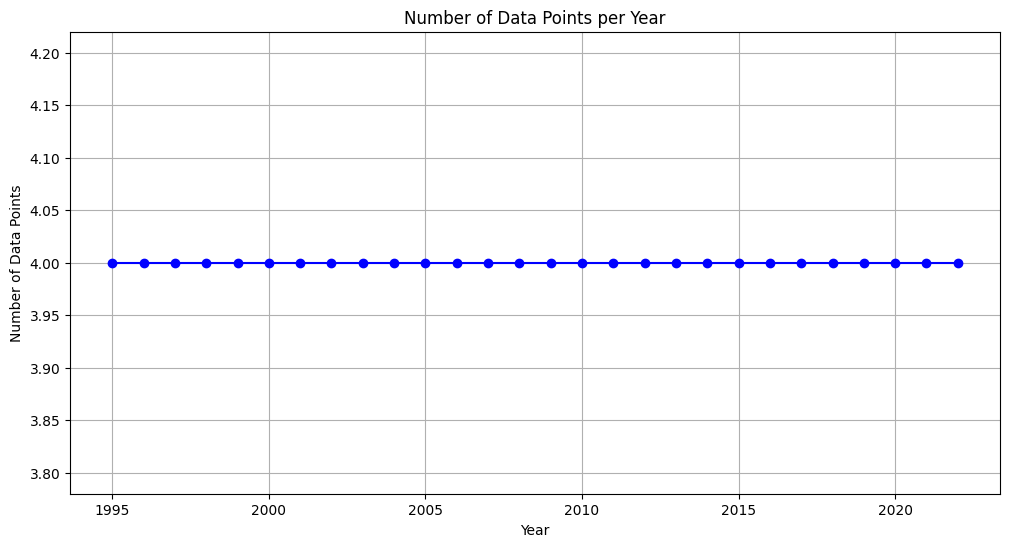

In [86]:
years = year_counts.index
counts = year_counts.values
#Create a line plot to identify missing rows."
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='b')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.grid(True)
plt.show()

In [87]:
df5 = pd.read_csv("GDP per head of population_USD, constant prices, 2015 PPPs.csv")

In [88]:
df5.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,FIN,Finland,T_GDPPOP,GDP per head of population,VPVOB,"USD, constant prices, 2015 PPPs",1995,1995,USD,US Dollar,0,Units,NaN,NaN,29700.255883,NaN,NaN
1,FIN,Finland,T_GDPPOP,GDP per head of population,VPVOB,"USD, constant prices, 2015 PPPs",1996,1996,USD,US Dollar,0,Units,NaN,NaN,30688.480662,NaN,NaN
2,FIN,Finland,T_GDPPOP,GDP per head of population,VPVOB,"USD, constant prices, 2015 PPPs",1997,1997,USD,US Dollar,0,Units,NaN,NaN,32535.722596,NaN,NaN
3,FIN,Finland,T_GDPPOP,GDP per head of population,VPVOB,"USD, constant prices, 2015 PPPs",1998,1998,USD,US Dollar,0,Units,NaN,NaN,34220.043078,NaN,NaN
4,FIN,Finland,T_GDPPOP,GDP per head of population,VPVOB,"USD, constant prices, 2015 PPPs",1999,1999,USD,US Dollar,0,Units,NaN,NaN,35635.757236,NaN,NaN


In [89]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               112 non-null    object 
 1   Country                112 non-null    object 
 2   SUBJECT                112 non-null    object 
 3   Subject                112 non-null    object 
 4   MEASURE                112 non-null    object 
 5   Measure                112 non-null    object 
 6   TIME                   112 non-null    int64  
 7   Time                   112 non-null    int64  
 8   Unit Code              112 non-null    object 
 9   Unit                   112 non-null    object 
 10  PowerCode Code         112 non-null    int64  
 11  PowerCode              112 non-null    object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  112 non-null    float64
 15  Flag C

In [90]:
df5.describe()

,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,112.000000,112.000000,112.0,0.0,0.0,112.000000,0.0,0.0
mean,2008.500000,2008.500000,0.0,NaN,NaN,60290.757941,NaN,NaN
std,8.114052,8.114052,0.0,NaN,NaN,27840.194892,NaN,NaN
min,1995.000000,1995.000000,0.0,NaN,NaN,29700.255883,NaN,NaN
25%,2001.750000,2001.750000,0.0,NaN,NaN,39469.325741,NaN,NaN
50%,2008.500000,2008.500000,0.0,NaN,NaN,45553.081877,NaN,NaN
75%,2015.250000,2015.250000,0.0,NaN,NaN,83926.185040,NaN,NaN
max,2022.000000,2022.000000,0.0,NaN,NaN,114804.566260,NaN,NaN


In [91]:
df5.isnull().sum()

LOCATION                   0
Country                    0
SUBJECT                    0
Subject                    0
MEASURE                    0
Measure                    0
TIME                       0
Time                       0
Unit Code                  0
Unit                       0
PowerCode Code             0
PowerCode                  0
Reference Period Code    112
Reference Period         112
Value                      0
Flag Codes               112
Flags                    112
dtype: int64

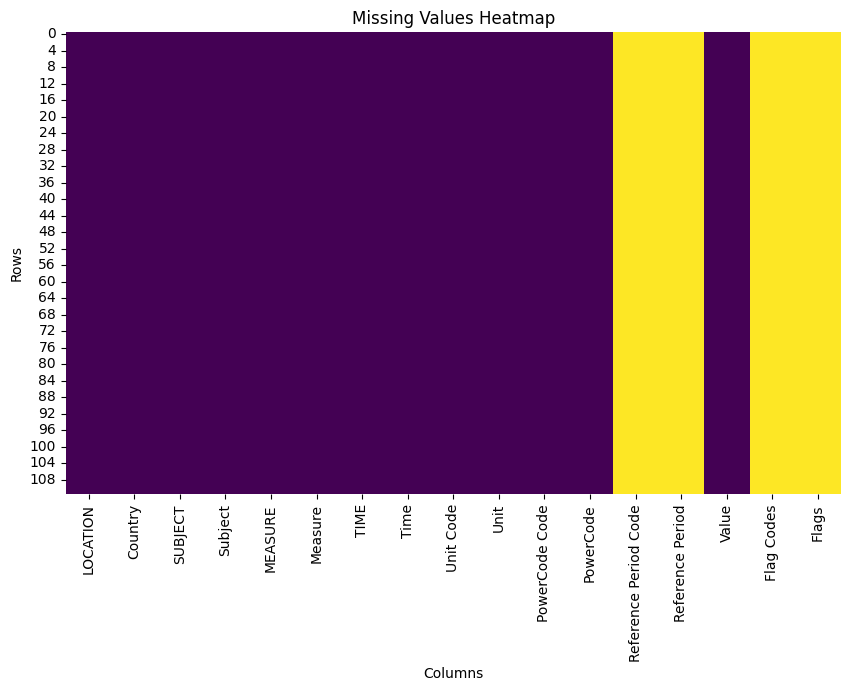

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(df5.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()



In [93]:
df5.shape

(112, 17)

In [94]:
df5 = df5[["Country","TIME","Value"]]
df5.rename(columns = {"Value":"GDP_per_head(USD)","TIME" :"Year" },inplace = True)
df5

,Country,Year,GDP_per_head(USD)
0,Finland,1995,29700.255883
1,Finland,1996,30688.480662
2,Finland,1997,32535.722596
3,Finland,1998,34220.043078
4,Finland,1999,35635.757236
...,...,...,...
107,Luxembourg,2018,108642.260430
108,Luxembourg,2019,109526.405470
109,Luxembourg,2020,106881.027690
110,Luxembourg,2021,112764.792420


In [95]:
year_counts = df5['Year'].value_counts().sort_index()
year_counts

Year
1995    4
1996    4
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    4
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    4
Name: count, dtype: int64

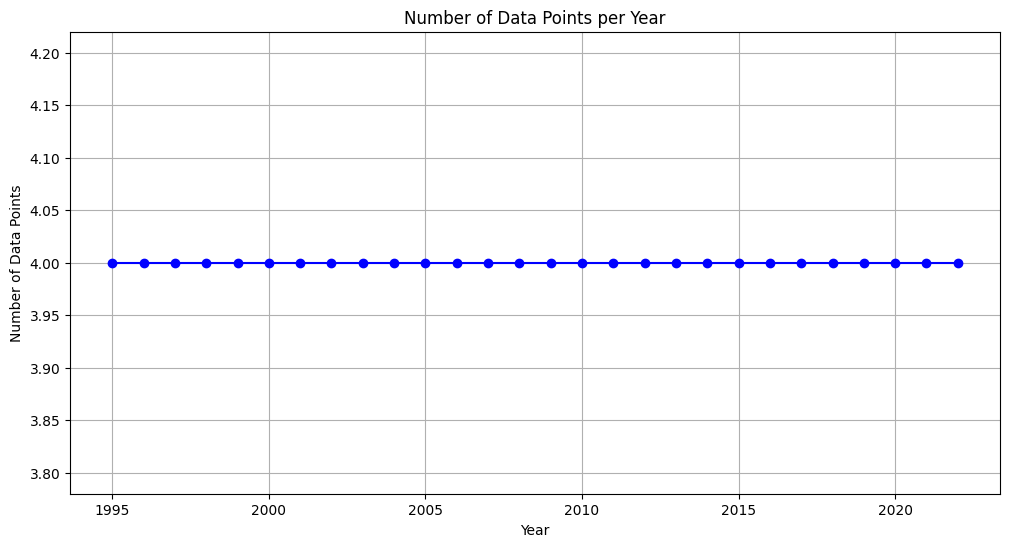

In [96]:
years = year_counts.index
counts = year_counts.values
#Create a line plot to identify missing rows."
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='b')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.grid(True)
plt.show()

In [97]:
dataframes = [df1,df2,df3,df4,df5]

from functools import reduce
combined_df = reduce(lambda left, right: pd.merge(left, right, on=['Year', 'Country'], how='outer'), dataframes)

In [98]:
combined_df

,Country,Year,Total rail freight transport(M),Rail passenger transport(M),Rail infrastructure investment(Euro),population(thousands),GDP_per_head(USD)
0,Luxembourg,1995,529.000000,286.000000,2.323176e+07,404.714,76432.925042
1,Luxembourg,1996,530.000000,284.000000,1.679143e+08,410.557,76575.898394
2,Luxembourg,1997,566.000000,295.000000,2.869643e+07,415.846,79690.213171
3,Luxembourg,1998,561.000000,300.000000,3.550748e+07,420.977,83940.521408
4,Luxembourg,1999,609.000000,310.000000,2.976182e+07,426.170,89509.623543
...,...,...,...,...,...,...,...
107,Finland,2019,10270.000000,4924.000000,4.620000e+08,5517.858,45808.054368
108,Finland,2020,10138.000000,2820.000000,6.840000e+08,5525.215,44655.694758
109,Finland,2021,10749.000000,2903.000000,6.060000e+08,5533.721,45981.904358
110,Finland,2022,8844.000000,4572.000000,6.060000e+08,5538.263,46588.971369


In [99]:
# Define the exchange rate for 2015 (1 USD to Euro rate for 2015)
exchange_rate_2015 = 0.92  # Replace this with the actual exchange rate if needed

# Modify column names and units
combined_df['Total rail freight transport'] = combined_df['Total rail freight transport(M)']*1e6  # Convert from thousands to 1 unit
combined_df['Rail passenger transport'] = combined_df['Rail passenger transport(M)']*1e6  # Convert from thousands to 1 unit
combined_df['GDP_per_head(Euro)'] = combined_df['GDP_per_head(USD)'] * exchange_rate_2015
combined_df['population'] = combined_df['population(thousands)'] * 1e3  # Convert from thousands to 1 unit

# Drop the original columns
combined_df.drop(['Total rail freight transport(M)', 'Rail passenger transport(M)', 'GDP_per_head(USD)', 'population(thousands)'], axis=1, inplace=True)



In [100]:
combined_df 

,Country,Year,Rail infrastructure investment(Euro),Total rail freight transport,Rail passenger transport,GDP_per_head(Euro),population
0,Luxembourg,1995,2.323176e+07,5.290000e+08,2.860000e+08,70318.291039,404714.0
1,Luxembourg,1996,1.679143e+08,5.300000e+08,2.840000e+08,70449.826522,410557.0
2,Luxembourg,1997,2.869643e+07,5.660000e+08,2.950000e+08,73314.996117,415846.0
3,Luxembourg,1998,3.550748e+07,5.610000e+08,3.000000e+08,77225.279695,420977.0
4,Luxembourg,1999,2.976182e+07,6.090000e+08,3.100000e+08,82348.853660,426170.0
...,...,...,...,...,...,...,...
107,Finland,2019,4.620000e+08,1.027000e+10,4.924000e+09,42143.410019,5517858.0
108,Finland,2020,6.840000e+08,1.013800e+10,2.820000e+09,41083.239177,5525215.0
109,Finland,2021,6.060000e+08,1.074900e+10,2.903000e+09,42303.352009,5533721.0
110,Finland,2022,6.060000e+08,8.844000e+09,4.572000e+09,42861.853659,5538263.0


In [101]:
import dash
from dash import dcc, html
import plotly.express as px

# Read data
data = combined_df  # Please replace with your data file path
# Create Dash application
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    # Country checkboxes
    html.Div([
        html.Label("Select Country:"),
        dcc.Checklist(
            id='country-checkboxes',
            options=[{'label': country, 'value': country} for country in data['Country'].unique()],
            value=['Luxembourg', "Ireland"]  # Default selected countries
        ),
    ], style={'width': '30%', 'display': 'inline-block'}),

    # Parameter dropdown 
    html.Div([
        dcc.Dropdown(
            id='parameter-dropdown',
            options=[
                {'label': 'Rail Infrastructure Investment', 'value': 'Rail infrastructure investment(Euro)'},
                {'label': 'Total Rail Freight Transport', 'value': 'Total rail freight transport'},
                {'label': 'Rail Passenger Transport', 'value': 'Rail passenger transport'},
                {'label': 'GDP per Head', 'value': 'GDP_per_head(Euro)'},
                {'label': 'Population', 'value': 'population'}
            ],
            value='Rail infrastructure investment(Euro)'  # Default selected parameter
        ),
    ], style={'position': 'absolute','width': '50%', 'right': '100px', 'top': '10px'}),  # Adjust the position if need

    # Line chart
    html.Div([
        dcc.Graph(id='line-plot'),
    ], style={'width': '80%', 'margin': 'auto'}),

    # Year range slider
    html.Div([
        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id='year-slider',
            min=data['Year'].min(),
            max=data['Year'].max(),
            step=1,
            marks={str(year): str(year) for year in data['Year'].unique()},
            value=[data['Year'].min(), data['Year'].max()]  # Default time range
        ),
    ], style={'width': '90%', 'margin': 'auto'}),
])

# Callback function to update the line plot
@app.callback(
    dash.dependencies.Output('line-plot', 'figure'),
    [
        dash.dependencies.Input('country-checkboxes', 'value'),
        dash.dependencies.Input('parameter-dropdown', 'value'),
        dash.dependencies.Input('year-slider', 'value')
     ]
)
def update_line_plot(selected_countries, selected_parameter, selected_years):
    filtered_data = data[
        (data['Country'].isin(selected_countries)) &
        (data['Year'] >= selected_years[0]) &
        (data['Year'] <= selected_years[1])
    ]

    fig = px.line(
        filtered_data,
        x='Year',
        y=selected_parameter,
        color='Country',
        labels={'Year': 'Year', 'value': 'Value'},
        title=f'{", ".join(selected_countries)} {selected_parameter} Data'
     )

    return fig
if __name__ == '__main__':
    app.run_server(debug=False, port=8081)  # Change the port to the desired value


In [102]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               112 non-null    object 
 1   Year                                  112 non-null    int64  
 2   Rail infrastructure investment(Euro)  112 non-null    float64
 3   Total rail freight transport          112 non-null    float64
 4   Rail passenger transport              112 non-null    float64
 5   GDP_per_head(Euro)                    112 non-null    float64
 6   population                            112 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB


#####  can see that all important variables are already either integers or floating-point numbers, preparing  for the next research.


In [103]:
combined_df.shape

(112, 7)

In [104]:
column_names = combined_df.columns
print(column_names)

Index(['Country', 'Year', 'Rail infrastructure investment(Euro)',
       'Total rail freight transport', 'Rail passenger transport',
       'GDP_per_head(Euro)', 'population'],
      dtype='object')


In [105]:
combined_df.describe()

,Year,Rail infrastructure investment(Euro),Total rail freight transport,Rail passenger transport,GDP_per_head(Euro),population
count,112.000000,1.120000e+02,1.120000e+02,1.120000e+02,112.000000,1.120000e+02
mean,2008.500000,2.696004e+09,8.016125e+09,9.652332e+10,55467.497306,3.425552e+07
std,8.114052,4.650674e+09,8.864309e+09,1.693245e+11,25612.979300,5.375847e+07
min,1995.000000,2.000000e+06,7.000000e+07,2.620000e+08,27324.235412,4.047140e+05
25%,2001.750000,1.385203e+08,2.290396e+08,7.412500e+08,36311.779682,2.835756e+06
50%,2008.500000,2.525193e+08,4.550500e+09,2.609500e+09,41908.835327,5.052395e+06
75%,2015.250000,2.682662e+09,1.289175e+10,8.316045e+09,77212.090237,3.522327e+07
max,2022.000000,1.755989e+10,2.510100e+10,4.416140e+11,105620.200959,1.281314e+08


###  Measure of centry tendency
    1 Mean
    2 Median¶
    3 Mode
    
###   Measure Of Dispersion
    1 Variance
    2 Standard Deviation

In [106]:
import statistics as stats

class CountryColumnStatistics:
    def __init__(self, df):
        self.df = df

    def calculate_statistics(self, country, column_name):
        # Filter the DataFrame by the specified country
        filtered_data = self.df[self.df['Country'] == country]

        # Extract data from the specified column
        column_data = filtered_data[column_name]
        
        # Calculate mean, median, mode, variance, and standard deviation
        mean_value = stats.mean(column_data)
        median_value = stats.median(column_data)
        mode_value = stats.mode(column_data)
        variance_value = stats.variance(column_data)
        stdev_value = stats.stdev(column_data)

        # Return the calculated statistics
        return {
            'Country': country,
            'Column': column_name,
            'Mean': mean_value,
            'Median': median_value,
            'Mode': mode_value,
            'Variance': variance_value,
            'Standard Deviation': stdev_value
        }

# Example usage:
# Calculate statistics for a specific country and column
country_name = 'Ireland'
column_name = 'Rail infrastructure investment(Euro)'
print(CountryColumnStatistics(combined_df).calculate_statistics(country_name, column_name))



{'Country': 'Ireland', 'Column': 'Rail infrastructure investment(Euro)', 'Mean': 160825032.29, 'Median': 101333319.07, 'Mode': 169578300.0, 'Variance': 8.033721740140429e+16, 'Standard Deviation': 283438207.37755924}


In [107]:
country_name = 'Ireland'
column_name = 'Total rail freight transport'
print(CountryColumnStatistics(combined_df).calculate_statistics(country_name, column_name))

{'Country': 'Ireland', 'Column': 'Total rail freight transport', 'Mean': 246678571.42857143, 'Median': 104000000.0, 'Mode': 100000000.0, 'Variance': 3.8200300264550264e+16, 'Standard Deviation': 195448970.99895477}


In [108]:
country_name = 'Ireland'
column_name = 'Rail passenger transport'
print(CountryColumnStatistics(combined_df).calculate_statistics(country_name, column_name))

{'Country': 'Ireland', 'Column': 'Rail passenger transport', 'Mean': 1656964285.7142856, 'Median': 1633000000.0, 'Mode': 1291000000.0, 'Variance': 1.3013825793650794e+17, 'Standard Deviation': 360746805.8576651}


In [109]:
country_name = 'Ireland'
column_name = 'GDP_per_head(Euro)'
print(CountryColumnStatistics(combined_df).calculate_statistics(country_name, column_name))

{'Country': 'Ireland', 'Column': 'GDP_per_head(Euro)', 'Mean': 54219.062277728575, 'Median': 48557.75942128, 'Mode': 28932.337189240003, 'Variance': 312744780.7010321, 'Standard Deviation': 17684.591618158225}


In [110]:
country_name = 'Ireland'
column_name = 'population'
print(CountryColumnStatistics(combined_df).calculate_statistics(country_name, column_name))

{'Country': 'Ireland', 'Column': 'population', 'Mean': 4297257.142857143, 'Median': 4452392.5, 'Mode': 3566367.0, 'Variance': 225419896780.12698, 'Standard Deviation': 474784.05278623983}


In [111]:
stats.variance(combined_df[combined_df["Country"] == 'Ireland']['Rail infrastructure investment(Euro)'])

8.033721740140429e+16

In [112]:
np.var(combined_df[combined_df["Country"] == 'Ireland']['Rail infrastructure investment(Euro)'])

7.746803106563984e+16

### Measures of Central Tendency and Measures of Dispersion have been calculated for the benchmark country Ireland, including Mean, Median, Mode, Variance, and Standard Deviation. If needed, users can directly utilize the CountryColumnStatistics class to view statistical data for other countries. Here, we won't list them one by one; this step is primarily for preparing possible inferential statistics in the future.
### It's worth noting that the Statistics module and Numpy module yield slightly different results when calculating Variance. The specific reason is that the statistics module calculates variance based on treating the dataset as a sample, with the denominator of the formula divided by (sample size - 1), while NumPy calculates it based on treating the dataset as a population, with the denominator of the formula divided by (population size).

### Histograms and Box-plot

Ireland - Total rail freight transport Statistics:
Q1 (25th percentile): 91750000.0
Q3 (75th percentile): 436000000.0
Lower Fence: 70000000.0
Higher Fence: 602000000.0


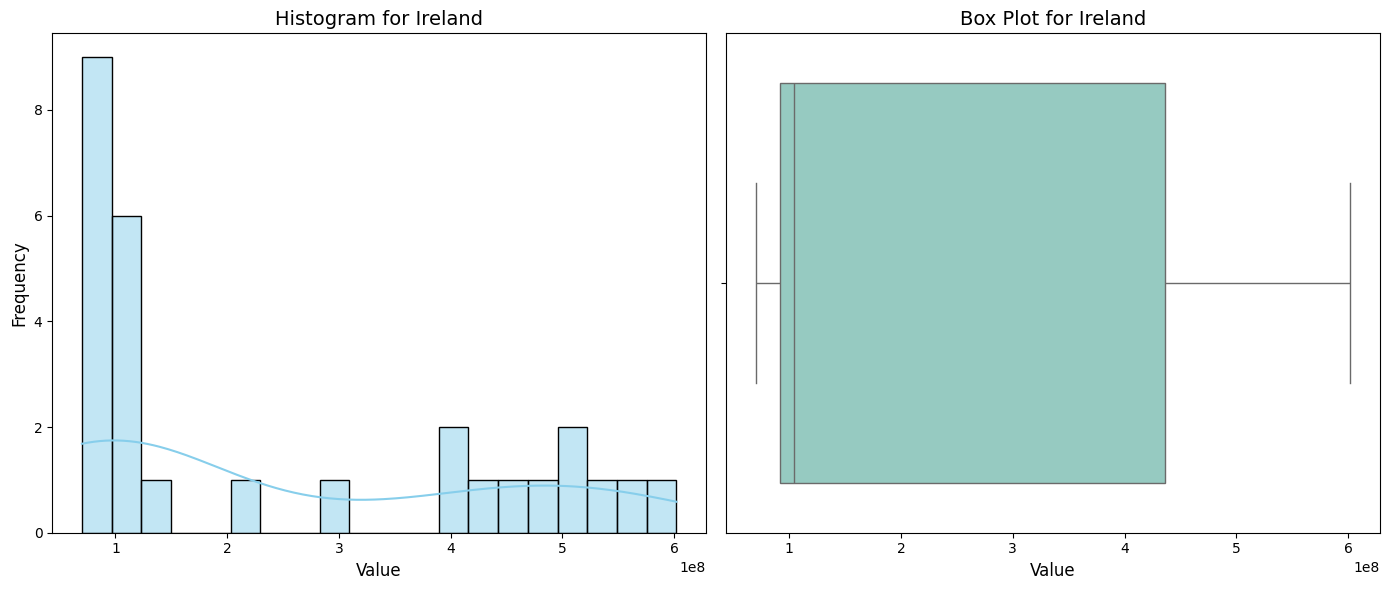

In [113]:

class CountryColumnPlotter:
    def __init__(self):
        pass

    def plot(self, df, country, column_name):
      
        filtered_data = df[df['Country'] == country]

        # Extract data from the specified column
        data_to_plot = filtered_data[column_name]

        # Calculate statistics for the box plot
        lower_fence, q1, q3, higher_fence = np.percentile(data_to_plot, [0, 25, 75, 100])

        # Create a new figure
        plt.figure(figsize=(14, 6))

   
        plt.subplot(1, 2, 1)
        sns.histplot(data_to_plot, bins=20, kde=True, color='skyblue')
        plt.title(f"Histogram for {country}", fontsize=14)
        plt.xlabel("Value", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

 
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data_to_plot, orient="h", palette="Set3")
        plt.title(f"Box Plot for {country}", fontsize=14)
        plt.xlabel("Value", fontsize=12)

        # Display statistics
        print(f"{country} - {column_name} Statistics:")
        print("Q1 (25th percentile):", q1)
        print("Q3 (75th percentile):", q3)
        print("Lower Fence:", lower_fence)
        print("Higher Fence:", higher_fence)

        # Adjust the layout of the plots
        plt.tight_layout()
        plt.show()
# Create a CountryColumnPlotter instance
plotter = CountryColumnPlotter()
# Plot data for a specific country and column
plotter.plot(combined_df, 'Ireland', 'Total rail freight transport')


#### From the histogram on the left, it can be observed that the data's overall distribution is skewed to the left and does not conform to the bell-shaped normal distribution. The box plot on the right also supports this observation, but it doesn't display many 

Ireland - Rail infrastructure investment(Euro) Statistics:
Q1 (25th percentile): 58786542.42
Q3 (75th percentile): 170658651.9775
Lower Fence: 2000000.0
Higher Fence: 1560069267.68


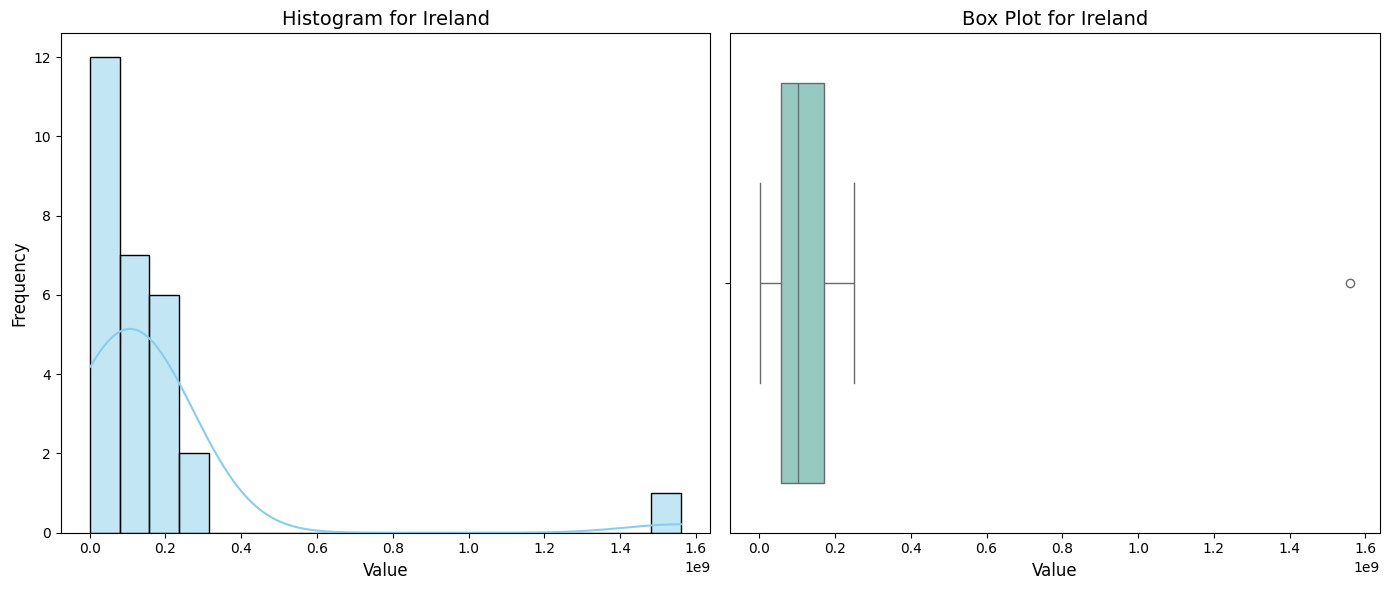

In [114]:
plotter.plot(combined_df, 'Ireland', 'Rail infrastructure investment(Euro)')


#### From the histogram on the left, it can be seen that the overall data is relatively concentrated, but it does not form a bell-shaped normal distribution. From the right-side box plot, it's clear that there are some outliers present.

Ireland - Rail passenger transport Statistics:
Q1 (25th percentile): 1448750000.0
Q3 (75th percentile): 1883250000.0
Lower Fence: 834000000.0
Higher Fence: 2399000000.0


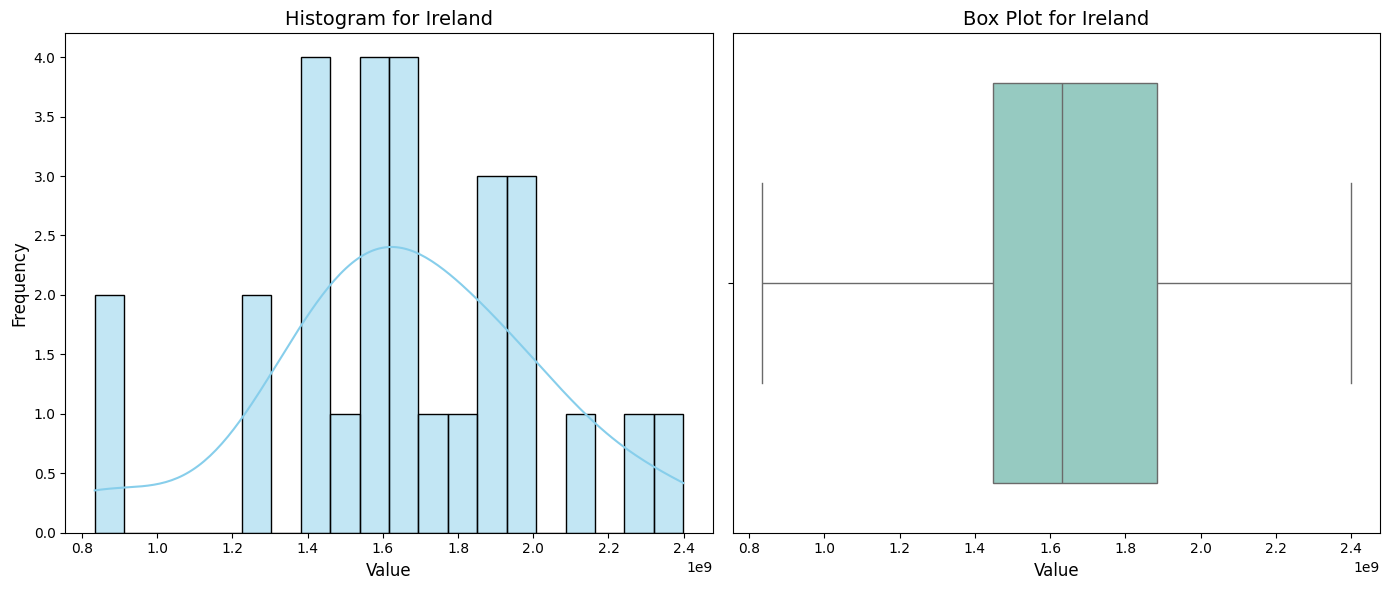

In [115]:
plotter.plot(combined_df, 'Ireland', 'Rail passenger transport')

#### From the histogram on the left, it can be observed that the overall data distribution is relatively symmetrical, resembling an initial bell-shaped distribution. However, further validation is required to confirm if it conforms to a normal distribution. The box plot on the right supports this observation, showing a steep descent on the right side of the data.

Ireland - GDP_per_head(Euro) Statistics:
Q1 (25th percentile): 45884.17649903001
Q3 (75th percentile): 63860.736845470004
Lower Fence: 28932.337189240003
Higher Fence: 99904.1413324


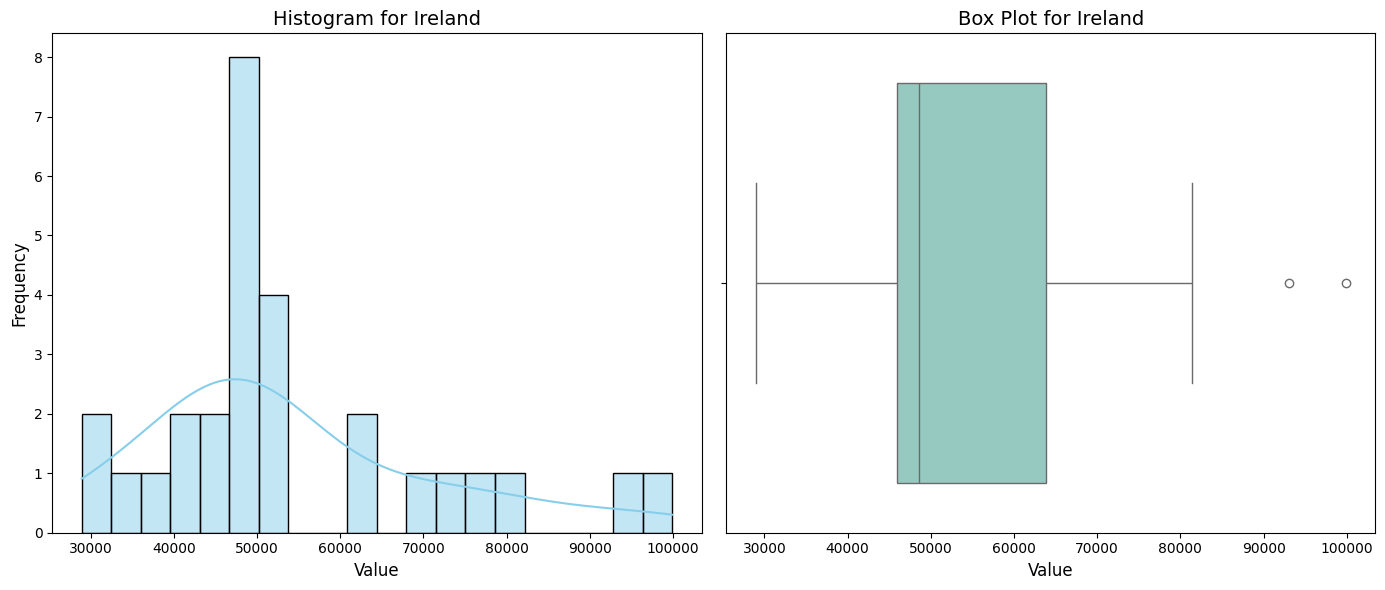

In [116]:
plotter.plot(combined_df, 'Ireland', 'GDP_per_head(Euro)')

#### From the histogram on the left, it can be observed that the overall data distribution is left-skewed, not conforming to a normal bell-shaped distribution. The box plot on the right supports this observation and reveals the presence of outliers, indicating a leftward skew in the data, likely attributable to these outliers.

Ireland - population Statistics:
Q1 (25th percentile): 3845541.5
Q3 (75th percentile): 4653681.0
Lower Fence: 3566367.0
Higher Fence: 5005888.0


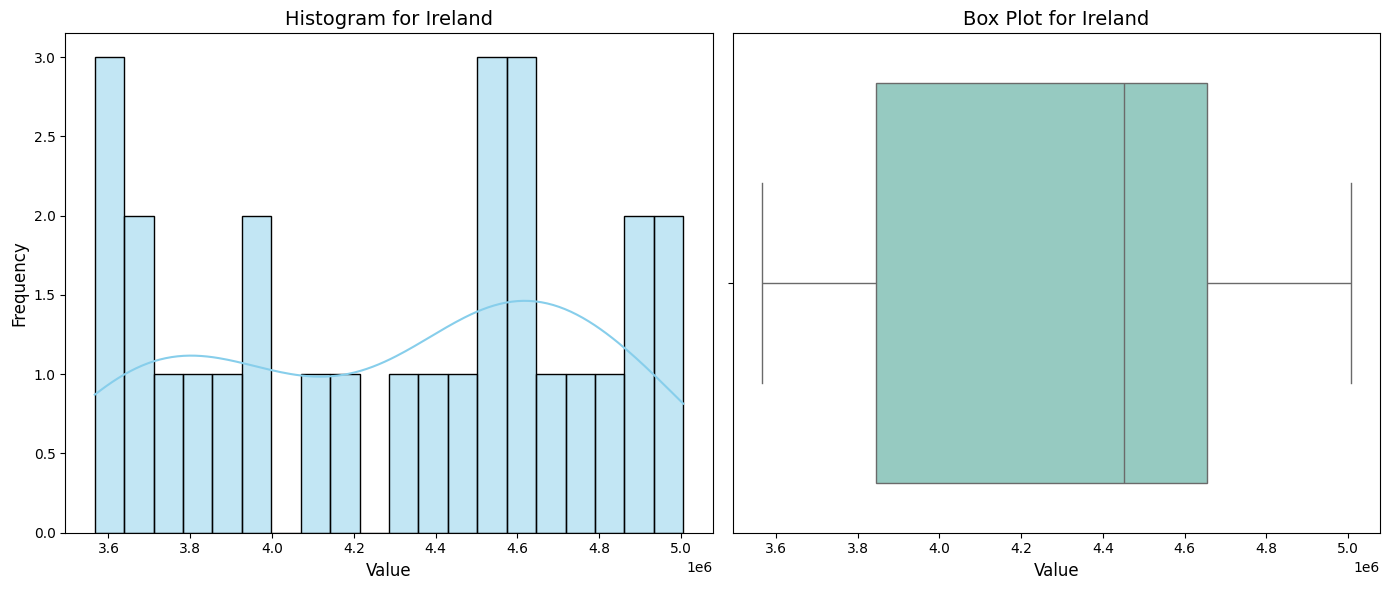

In [117]:
plotter.plot(combined_df, 'Ireland', 'population')

#### From the histogram on the left, it can be observed that the data is somewhat evenly distributed across various quantity ranges, not conforming to a normal bell-shaped distribution. The box plot on the right supports this observation, and no significant outliers are evident.

### The distributions and presence of outliers for all the important variables of the benchmark country, Ireland, have been listed above. It can be observed that most of the distributions do not conform to a normal bell-shaped distribution, and outliers are present. This may pose challenges for subsequent parameter analysis. To avoid redundancy, not all charts for all variables of all countries are displayed here. However, if there is a need in the future, they can be accessed through the CountryColumnPlotter class.

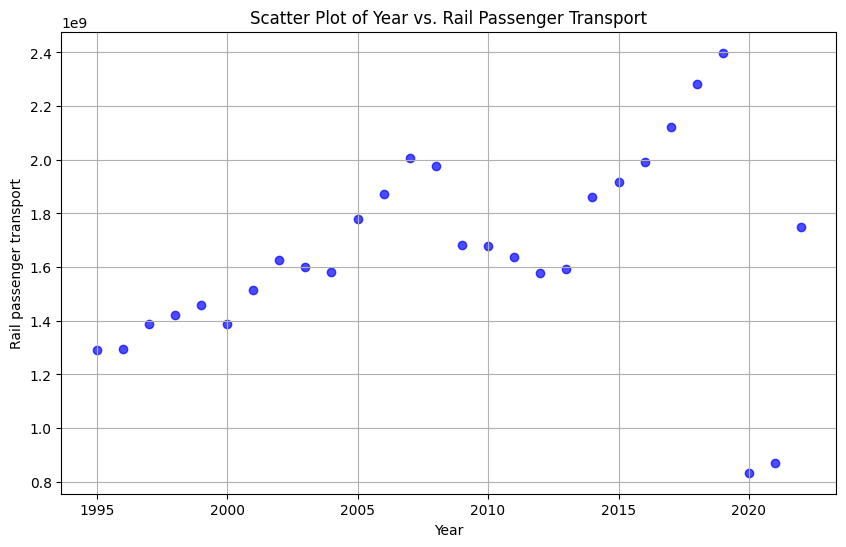

Spearman Rank Correlation Coefficient: 0.46360153256704983
P-value: 0.012963719568346138
Reject the null hypothesis: There is a correlation between Year and Rail passenger transport


In [118]:
from scipy.stats import spearmanr

ireland_data = combined_df[combined_df['Country'] == "Ireland"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ireland_data['Year'], ireland_data['Rail passenger transport'], c='blue', alpha=0.7)


plt.title("Scatter Plot of Year vs. Rail Passenger Transport")
plt.xlabel("Year")
plt.ylabel('Rail passenger transport')
plt.grid(True)
plt.show()

# Perform the Spearman rank correlation coefficient hypothesis test
corr_coefficient, p_value = spearmanr(ireland_data['Year'], ireland_data['Rail passenger transport'])

# Print the correlation coefficient and p-value
print(f"Spearman Rank Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Set the significance level (usually 0.05) and check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a correlation between Year and Rail passenger transport")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude a correlation between Year and Rail passenger transport")


### 从上面的分析可以得出 Ireland 的 Rail passenger transport 与 Year 有较弱的正相关，同时我们可以发现 2020，2021，2022，这三年的数据不符合历史趋势，呈陡然下降，又缓慢回升的趋势，这与大流行的实际情况相符。

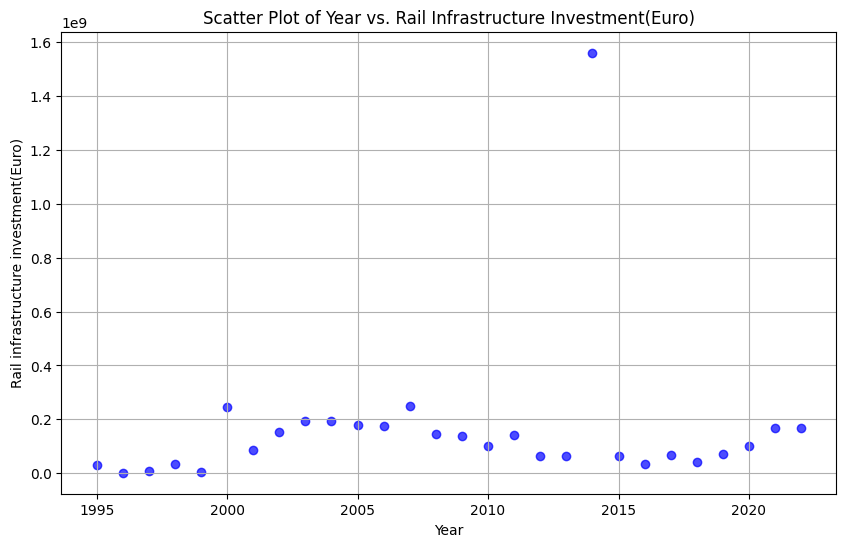

Spearman Rank Correlation Coefficient: 0.17380594113769154
P-value: 0.3764138993637496
Fail to reject the null hypothesis: There is not enough evidence to conclude a correlation between Year and Rail infrastructure investment(Euro)


In [119]:
from scipy.stats import spearmanr

ireland_data = combined_df[combined_df['Country'] == "Ireland"]


plt.figure(figsize=(10, 6))
plt.scatter(ireland_data['Year'], ireland_data['Rail infrastructure investment(Euro)'], c='blue', alpha=0.7)
plt.title("Scatter Plot of Year vs. Rail Infrastructure Investment(Euro)")
plt.xlabel("Year")
plt.ylabel('Rail infrastructure investment(Euro)')
plt.grid(True)
plt.show()

# Perform the Spearman rank correlation coefficient hypothesis test
corr_coefficient, p_value = spearmanr(ireland_data['Year'], ireland_data['Rail infrastructure investment(Euro)'])

# Print the correlation coefficient and p-value
print(f"Spearman Rank Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Set the significance level (usually 0.05) and check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a correlation between Year and Rail infrastructure investment(Euro)")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude a correlation between Year and Rail infrastructure investment(Euro)")


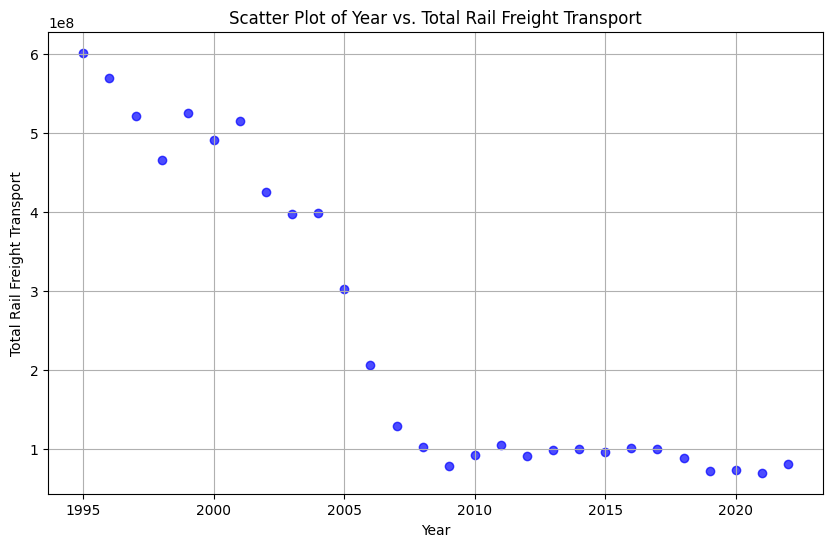

Spearman Rank Correlation Coefficient: -0.9270562561155297
P-value: 1.3904026326454338e-12
Reject the null hypothesis: There is a correlation between Year and Total Rail Freight Transport


In [120]:
from scipy.stats import spearmanr

ireland_data = combined_df[combined_df['Country'] == "Ireland"]


plt.figure(figsize=(10, 6))
plt.scatter(ireland_data['Year'], ireland_data['Total rail freight transport'], c='blue', alpha=0.7)
plt.title("Scatter Plot of Year vs. Total Rail Freight Transport")
plt.xlabel("Year")
plt.ylabel('Total Rail Freight Transport')
plt.grid(True)
plt.show()

# Perform the Spearman rank correlation coefficient hypothesis test
corr_coefficient, p_value = spearmanr(ireland_data['Year'], ireland_data['Total rail freight transport'])

# Print the correlation coefficient and p-value
print(f"Spearman Rank Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Set the significance level (usually 0.05) and check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a correlation between Year and Total Rail Freight Transport")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude a correlation between Year and Total Rail Freight Transport")


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

class DataAnalyzer:
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name
        self.columns_to_analyze = self.data.columns[2:]
        self.countries = self.data['Country'].unique()

    def analyze_column(self):
        plt.figure(figsize=(12, 5))

        # 绘制QQ-Plot
        for i in range(0, len(self.countries), 4):
            part_countries = self.countries[i:i + 4]

            for j, country in enumerate(part_countries):
                plt.subplot(1, 4, j + 1)

                country_data = self.data[self.data['Country'] == country]
                stats.probplot(country_data[self.column_name], dist="norm", plot=plt, rvalue=True, fit=True)
                plt.title(f'{country}')

            plt.tight_layout()

        # 添加间隔
        plt.subplots_adjust(wspace=0.5)
        plt.show()

        # 进行Shapiro-Wilk检验
        for i in range(0, len(self.countries), 4):
            part_countries = self.countries[i:i + 4]

            for country in part_countries:
                country_data = self.data[self.data['Country'] == country][self.column_name]
                stat, p = stats.shapiro(country_data)
                alpha = 0.05
                if p > alpha:
                    shapiro_result = 'Follows Normal Distribution'
                else:
                    shapiro_result = 'Does Not Follow Normal Distribution'

                print(f'{self.column_name} in {country} - Shapiro-Wilk Test: {shapiro_result} (p-value: {p:.4f})')


####  Create a class that can be used to perform QQ-plot and Shapiro-Wilk Test normality distribution tests on different parameters for various countries through function calls.

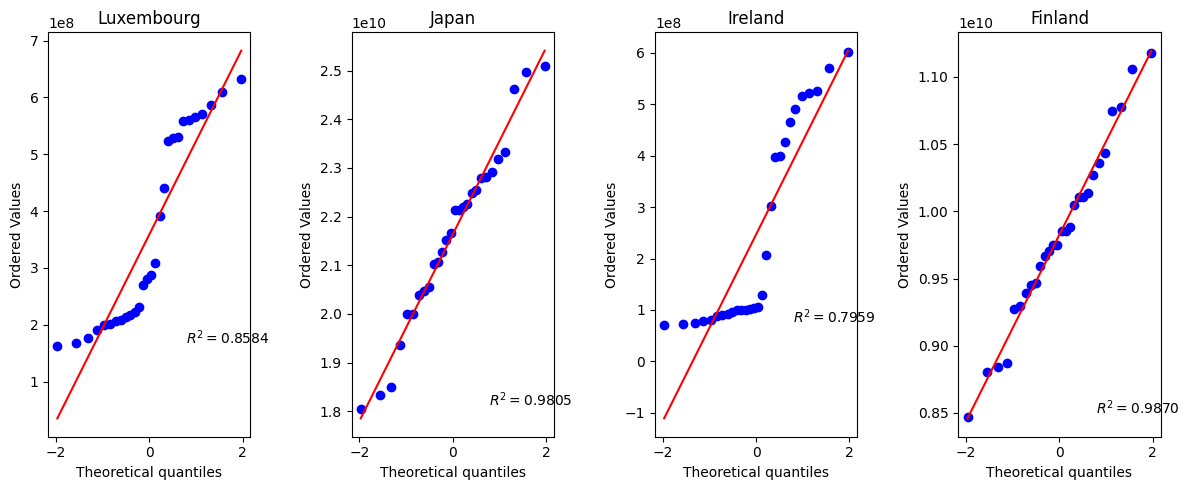

Total rail freight transport in Luxembourg - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0005)
Total rail freight transport in Japan - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.6753)
Total rail freight transport in Ireland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0000)
Total rail freight transport in Finland - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.9259)


In [122]:

analyzer = DataAnalyzer(combined_df, "Total rail freight transport")  
analyzer.analyze_column()

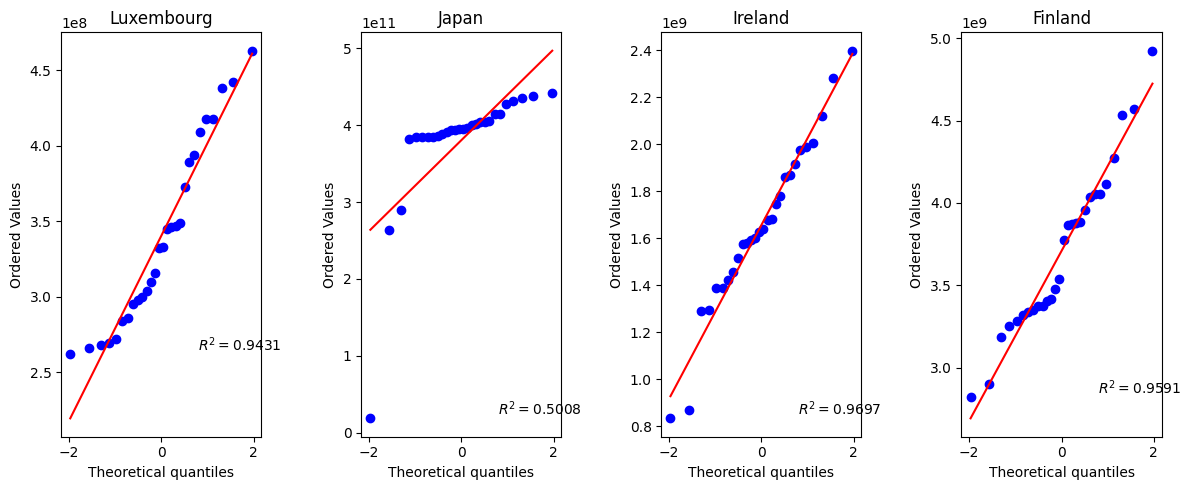

Rail passenger transport in Luxembourg - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.0538)
Rail passenger transport in Japan - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0000)
Rail passenger transport in Ireland - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.6781)
Rail passenger transport in Finland - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.3297)


In [123]:
analyzer = DataAnalyzer(combined_df, "Rail passenger transport")  
analyzer.analyze_column()

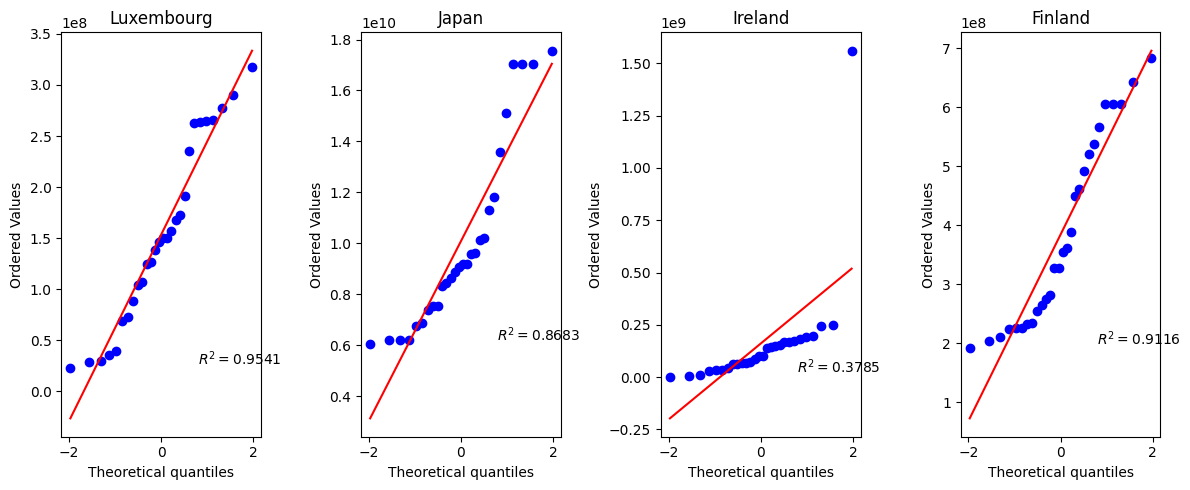

Rail infrastructure investment(Euro) in Luxembourg - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.0949)
Rail infrastructure investment(Euro) in Japan - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0011)
Rail infrastructure investment(Euro) in Ireland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0000)
Rail infrastructure investment(Euro) in Finland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0081)


In [124]:
analyzer = DataAnalyzer(combined_df
                        , "Rail infrastructure investment(Euro)")  
analyzer.analyze_column()

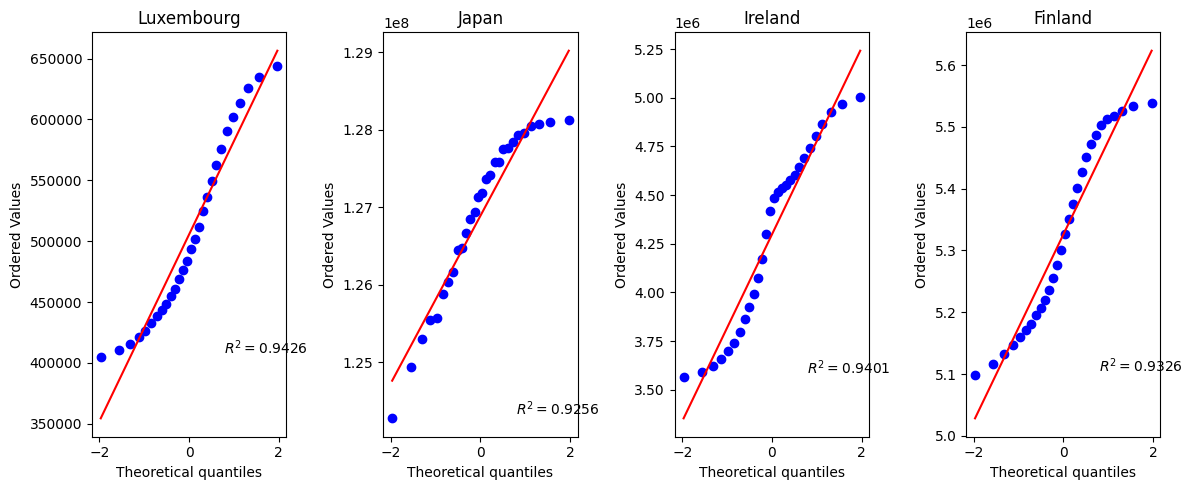

population in Luxembourg - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0448)
population in Japan - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0271)
population in Ireland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0342)
population in Finland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0203)


In [125]:
analyzer = DataAnalyzer(combined_df, "population")  
analyzer.analyze_column()

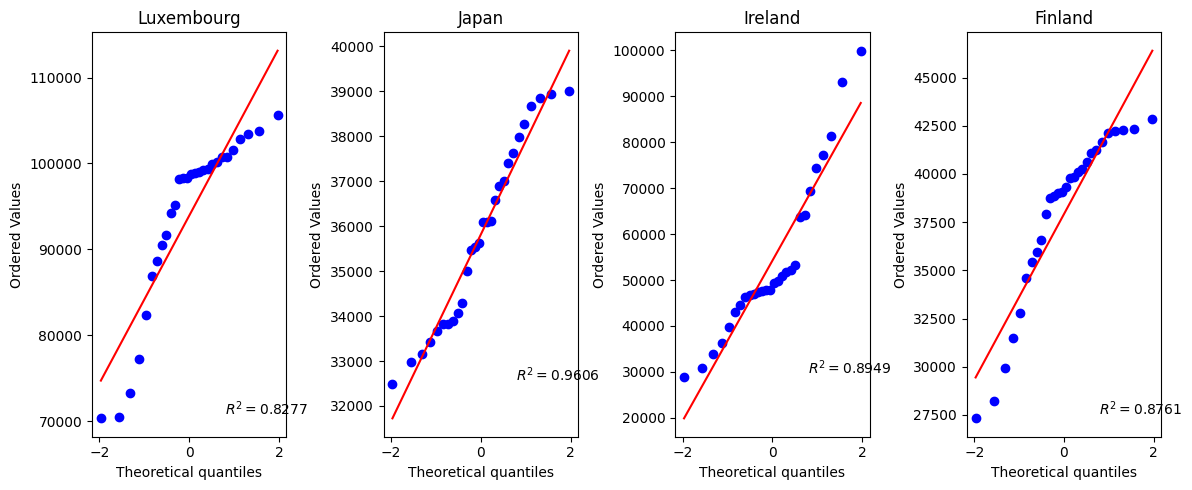

GDP_per_head(Euro) in Luxembourg - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0003)
GDP_per_head(Euro) in Japan - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.1278)
GDP_per_head(Euro) in Ireland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0090)
GDP_per_head(Euro) in Finland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0022)


In [126]:
analyzer = DataAnalyzer(combined_df, "GDP_per_head(Euro)") 
analyzer.analyze_column()

In [127]:

from scipy.stats import levene
combined_df
# Select data for three countries
luxembourg_data = combined_df[combined_df['Country'] == 'Luxembourg']['Rail passenger transport']
ireland_data = combined_df[combined_df['Country'] == 'Ireland']['Rail passenger transport']
finland_data = combined_df[combined_df['Country'] == 'Finland']['Rail passenger transport']

# Perform Levene's Test
statistic, p_value = levene(luxembourg_data, ireland_data, finland_data)

# Print the results
print(f'Levene\'s Test Statistic: {statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: The variances are not equal.')
else:
    print('Fail to reject the null hypothesis: The variances are equal.')


Levene's Test Statistic: 21.8144
p-value: 0.0000
Reject the null hypothesis: The variances are not equal.


#### The selected three countries follow a normal distribution but do not meet the assumption of homogeneity of variances.

In [128]:
import pandas as pd
from scipy.stats import levene
import numpy as np

# Assume combined_df is your DataFrame

# Select data for three countries
luxembourg_data = combined_df[combined_df['Country'] == 'Luxembourg']['Rail passenger transport']
ireland_data = combined_df[combined_df['Country'] == 'Ireland']['Rail passenger transport']
finland_data = combined_df[combined_df['Country'] == 'Finland']['Rail passenger transport']

# Apply a logarithmic transformation to the data
luxembourg_data_log = np.log(luxembourg_data)
ireland_data_log = np.log(ireland_data)
finland_data_log = np.log(finland_data)

# Perform Levene's Test
statistic, p_value = levene(luxembourg_data_log, ireland_data_log, finland_data_log)

# Print the results
print(f'Levene\'s Test Statistic: {statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: The variances are not equal after log transformation.')
else:
    print('Fail to reject the null hypothesis: The variances are equal after log transformation.')


Levene's Test Statistic: 1.6426
p-value: 0.1998
Fail to reject the null hypothesis: The variances are equal after log transformation.


####  After logarithmic transformation, the three countries now satisfy the assumption of homogeneity of variances.

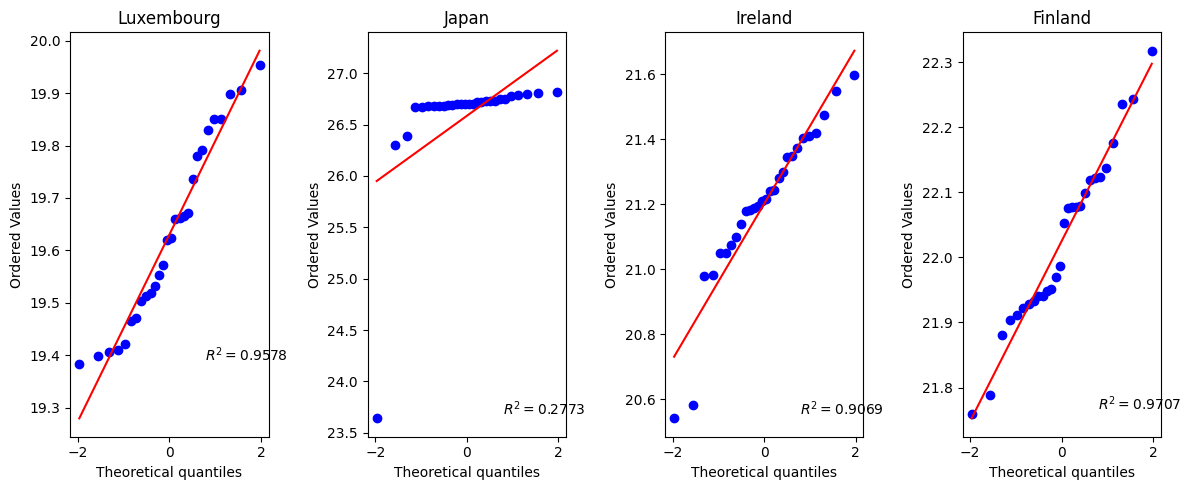

Log Rail passenger transport in Luxembourg - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.1147)
Log Rail passenger transport in Japan - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0000)
Log Rail passenger transport in Ireland - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0251)
Log Rail passenger transport in Finland - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.5759)


In [129]:

combined_df['Log Rail passenger transport'] = np.log(combined_df['Rail passenger transport'])
analyzer = DataAnalyzer(combined_df, 'Log Rail passenger transport')  
analyzer.analyze_column()

#### A normality test was conducted again after the logarithmic transformation to check for any changes.
#### The results indicate that the data for Ireland no longer follows a normal distribution. This observation, coupled with the previous scatter plot analysis revealing outliers in the Irish data, led to the decision to address and eliminate these outliers.

In [130]:
combined_df1 = combined_df[combined_df['Year'] <= 2019]

In [131]:
import pandas as pd
from scipy.stats import levene
import numpy as np


luxembourg_data = combined_df1[combined_df1['Country'] == 'Luxembourg']['Rail passenger transport']
ireland_data = combined_df1[combined_df1['Country'] == 'Ireland']['Rail passenger transport']
finland_data = combined_df1[combined_df1['Country'] == 'Finland']['Rail passenger transport']


luxembourg_data_log = np.log(luxembourg_data)
ireland_data_log = np.log(ireland_data)
finland_data_log = np.log(finland_data)

# Levene's Test
statistic, p_value = levene(luxembourg_data_log, ireland_data_log, finland_data_log)


print(f'Levene\'s Test Statistic: {statistic:.4f}')
print(f'p-value: {p_value:.4f}')


alpha = 0.05  # 显著性水平
if p_value < alpha:
    print('Reject the null hypothesis: The variances are not equal after log transformation.')
else:
    print('Fail to reject the null hypothesis: The variances are equal after log transformation.')


Levene's Test Statistic: 2.1550
p-value: 0.1233
Fail to reject the null hypothesis: The variances are equal after log transformation.


In [132]:
combined_df1['Log Rail passenger transport'] = np.log(combined_df1['Rail passenger transport'])

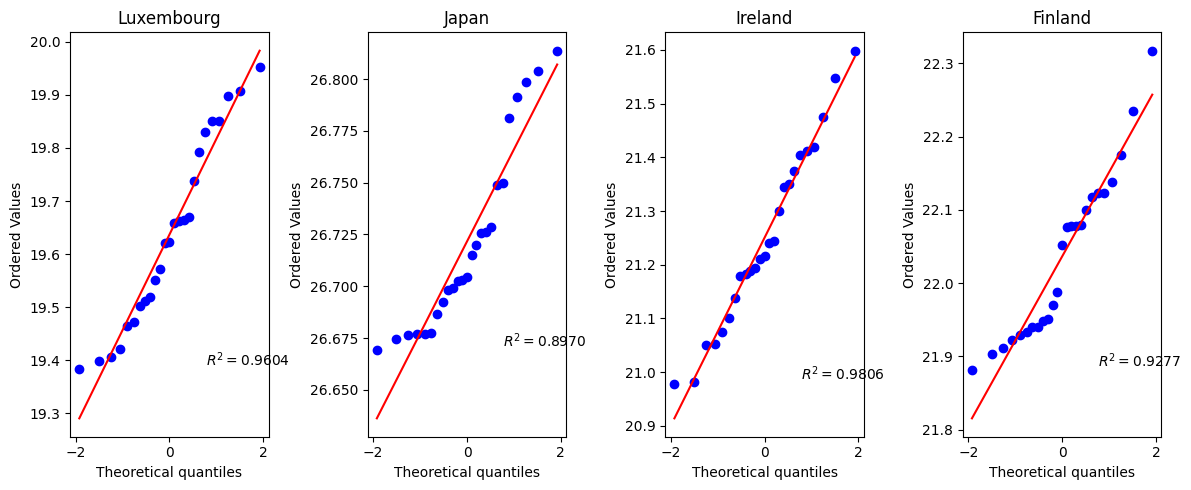

Log Rail passenger transport in Luxembourg - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.1708)
Log Rail passenger transport in Japan - Shapiro-Wilk Test: Does Not Follow Normal Distribution (p-value: 0.0078)
Log Rail passenger transport in Ireland - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.6832)
Log Rail passenger transport in Finland - Shapiro-Wilk Test: Follows Normal Distribution (p-value: 0.0609)


In [133]:
analyzer = DataAnalyzer(combined_df1, 'Log Rail passenger transport')  # 请替换成你要分析的列名
analyzer.analyze_column()

#### After handling the outliers and applying a logarithmic transformation, the data for all three countries now adhere to the assumptions of normal distribution and homoscedasticity (equal variance).

In [134]:
from scipy.stats import f_oneway
# Select data for three countries
luxembourg_data = combined_df1[combined_df1['Country'] == 'Luxembourg']['Log Rail passenger transport']
ireland_data = combined_df1[combined_df1['Country'] == 'Ireland']['Log Rail passenger transport']
finland_data = combined_df1[combined_df1['Country'] == 'Finland']['Log Rail passenger transport']

# Perform one-way ANOVA 
f_statistic, p_value = f_oneway(luxembourg_data, ireland_data, finland_data)

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference among the groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference among the groups.')


F-statistic: 1545.5111
p-value: 0.0000
Reject the null hypothesis: There is a significant difference among the groups.


In [135]:
import pandas as pd
from scipy.stats import ttest_ind
# Select data for three countries
luxembourg_data = combined_df1[combined_df1['Country'] == 'Luxembourg']['Log Rail passenger transport']
ireland_data = combined_df1[combined_df1['Country'] == 'Ireland']['Log Rail passenger transport']
finland_data = combined_df1[combined_df1['Country'] == 'Finland']['Log Rail passenger transport']

# Perform independent two-sample t-tests
t_statistic1, p_value1 = ttest_ind(luxembourg_data, ireland_data)
t_statistic2, p_value2 = ttest_ind(luxembourg_data, finland_data)
t_statistic3, p_value3 = ttest_ind(ireland_data, finland_data)


print(f'Luxembourg vs. Ireland - t-statistic: {t_statistic1:.4f}, p-value: {p_value1:.4f}')
print(f'Luxembourg vs. Finland - t-statistic: {t_statistic2:.4f}, p-value: {p_value2:.4f}')
print(f'Ireland vs. Finland - t-statistic: {t_statistic3:.4f}, p-value: {p_value3:.4f}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value1 < alpha:
    print('Luxembourg vs. Ireland: Reject the null hypothesis - There is a significant difference.')
else:
    print('Luxembourg vs. Ireland: Fail to reject the null hypothesis - There is no significant difference.')

if p_value2 < alpha:
    print('Luxembourg vs. Finland: Reject the null hypothesis - There is a significant difference.')
else:
    print('Luxembourg vs. Finland: Fail to reject the null hypothesis - There is no significant difference.')

if p_value3 < alpha:
    print('Ireland vs. Finland: Reject the null hypothesis - There is a significant difference.')
else:
    print('Ireland vs. Finland: Fail to reject the null hypothesis - There is no significant difference.')


Luxembourg vs. Ireland - t-statistic: -33.0562, p-value: 0.0000
Luxembourg vs. Finland - t-statistic: -57.1769, p-value: 0.0000
Ireland vs. Finland - t-statistic: -19.2574, p-value: 0.0000
Luxembourg vs. Ireland: Reject the null hypothesis - There is a significant difference.
Luxembourg vs. Finland: Reject the null hypothesis - There is a significant difference.
Ireland vs. Finland: Reject the null hypothesis - There is a significant difference.


In [136]:
from scipy.stats import kruskal

luxembourg_data = combined_df[combined_df['Country'] == 'Luxembourg']['Rail infrastructure investment(Euro)']
japan_data = combined_df[combined_df['Country'] == 'Japan']['Rail infrastructure investment(Euro)']
ireland_data = combined_df[combined_df['Country'] == 'Ireland']['Rail infrastructure investment(Euro)']
finland_data = combined_df[combined_df['Country'] == 'Finland']['Rail infrastructure investment(Euro)']

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(luxembourg_data, japan_data, ireland_data, finland_data)

# Print the results
print(f'Kruskal-Wallis Test Statistic: {statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference among the groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference among the groups.')


Kruskal-Wallis Test Statistic: 85.1228
p-value: 0.0000
Reject the null hypothesis: There is a significant difference among the groups.


Mann-Whitney U Test (Ireland vs. Luxembourg):
Statistic: 304.0000
p-value: 0.1516
Fail to reject the null hypothesis: There is no significant difference in the medians of Ireland and Luxembourg.


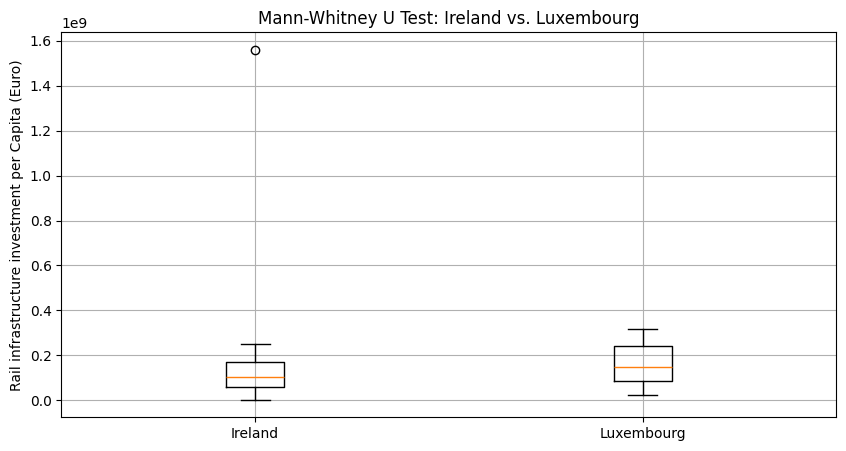

In [137]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Select the two countries to compare
country1 = 'Ireland'
country2 = 'Luxembourg'
data_country1 = combined_df[combined_df['Country'] == country1]['Rail infrastructure investment(Euro)']
data_country2 = combined_df[combined_df['Country'] == country2]['Rail infrastructure investment(Euro)']

# Perform Mann-Whitney U test
statistic1, p_value1 = stats.mannwhitneyu(data_country1, data_country2, alternative='two-sided')

# Create a visualization
plt.figure(figsize=(10, 5))
plt.boxplot([data_country1, data_country2], labels=[country1, country2])
plt.title(f'Mann-Whitney U Test: {country1} vs. {country2}')
plt.ylabel('Rail infrastructure investment per Capita (Euro)')
plt.grid(True)
 
 
print(f'Mann-Whitney U Test ({country1} vs. {country2}):')
print(f'Statistic: {statistic1:.4f}')
print(f'p-value: {p_value1:.4f}')
# Interpret the results
alpha = 0.05
if p_value1 < alpha:
    print(f'Reject the null hypothesis: The medians of {country1} and {country2} are significantly different.')
else:
    print(f'Fail to reject the null hypothesis: There is no significant difference in the medians of {country1} and {country2}.')

# Show the visualization
plt.show()


Mann-Whitney U Test (Ireland vs. Japan):
Statistic: 0.0000
p-value: 0.0000
Reject the null hypothesis: The medians of Ireland and Japan are significantly different.


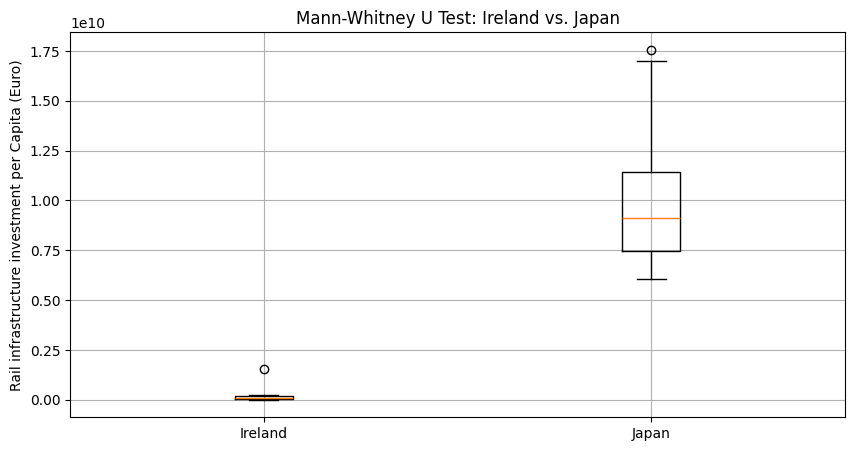

In [138]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Select two countries for comparison
country1 = 'Ireland'
country2 = 'Japan'
data_country1 = combined_df[combined_df['Country'] == country1]['Rail infrastructure investment(Euro)']
data_country2 = combined_df[combined_df['Country'] == country2]['Rail infrastructure investment(Euro)']

# Perform the Mann-Whitney U test
statistic1, p_value1 = stats.mannwhitneyu(data_country1, data_country2, alternative='two-sided')

# Create a visualization using a boxplot
plt.figure(figsize=(10, 5))
plt.boxplot([data_country1, data_country2], labels=[country1, country2])
plt.title(f'Mann-Whitney U Test: {country1} vs. {country2}')
plt.ylabel('Rail infrastructure investment per Capita (Euro)')
plt.grid(True)

# Print the test results
print(f'Mann-Whitney U Test ({country1} vs. {country2}):')
print(f'Statistic: {statistic1:.4f}')
print(f'p-value: {p_value1:.4f}')

# Interpret the results
alpha = 0.05
if p_value1 < alpha:
    print(f'Reject the null hypothesis: The medians of {country1} and {country2} are significantly different.')
else:
    print(f'Fail to reject the null hypothesis: There is no significant difference in the medians of {country1} and {country2}.')

# Display the visualization
plt.show()


Mann-Whitney U Test (Ireland vs. Finland):
Statistic: 46.0000
p-value: 0.0000
Reject the null hypothesis: The medians of Ireland and Finland are significantly different.


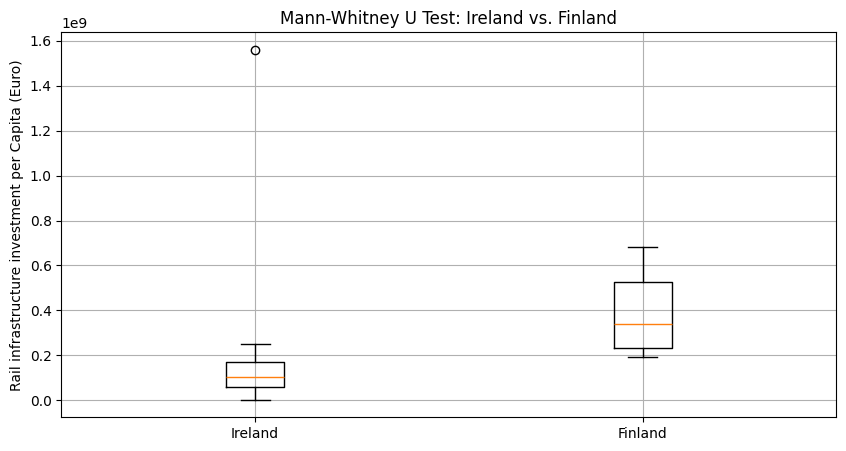

In [139]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Select two countries for comparison
country1 = 'Ireland'
country2 = 'Finland'


data_country1 = combined_df[combined_df['Country'] == country1]['Rail infrastructure investment(Euro)']
data_country2 = combined_df[combined_df['Country'] == country2]['Rail infrastructure investment(Euro)']

# Perform the Mann-Whitney U test
statistic1, p_value1 = stats.mannwhitneyu(data_country1, data_country2, alternative='two-sided')

# Create a visualization using a boxplot
plt.figure(figsize=(10, 5))
plt.boxplot([data_country1, data_country2], labels=[country1, country2])
plt.title(f'Mann-Whitney U Test: {country1} vs. {country2}')
plt.ylabel('Rail infrastructure investment per Capita (Euro)')
plt.grid(True)

# Print the test results
print(f'Mann-Whitney U Test ({country1} vs. {country2}):')
print(f'Statistic: {statistic1:.4f}')
print(f'p-value: {p_value1:.4f}')

# Interpret the results
alpha = 0.1
if p_value1 < alpha:
    print(f'Reject the null hypothesis: The medians of {country1} and {country2} are significantly different.')
else:
    print(f'Fail to reject the null hypothesis: There is no significant difference in the medians of {country1} and {country2}.')

# Display the visualization
plt.show()


In [140]:
combined_df

,Country,Year,Rail infrastructure investment(Euro),Total rail freight transport,Rail passenger transport,GDP_per_head(Euro),population,Log Rail passenger transport
0,Luxembourg,1995,2.323176e+07,5.290000e+08,2.860000e+08,70318.291039,404714.0,19.471502
1,Luxembourg,1996,1.679143e+08,5.300000e+08,2.840000e+08,70449.826522,410557.0,19.464485
2,Luxembourg,1997,2.869643e+07,5.660000e+08,2.950000e+08,73314.996117,415846.0,19.502486
3,Luxembourg,1998,3.550748e+07,5.610000e+08,3.000000e+08,77225.279695,420977.0,19.519293
4,Luxembourg,1999,2.976182e+07,6.090000e+08,3.100000e+08,82348.853660,426170.0,19.552083
...,...,...,...,...,...,...,...,...
107,Finland,2019,4.620000e+08,1.027000e+10,4.924000e+09,42143.410019,5517858.0,22.317387
108,Finland,2020,6.840000e+08,1.013800e+10,2.820000e+09,41083.239177,5525215.0,21.760003
109,Finland,2021,6.060000e+08,1.074900e+10,2.903000e+09,42303.352009,5533721.0,21.789011
110,Finland,2022,6.060000e+08,8.844000e+09,4.572000e+09,42861.853659,5538263.0,22.243217


In [141]:
combined_df.drop(columns = ["Log Rail passenger transport"],inplace = True)

In [142]:
combined_df

,Country,Year,Rail infrastructure investment(Euro),Total rail freight transport,Rail passenger transport,GDP_per_head(Euro),population
0,Luxembourg,1995,2.323176e+07,5.290000e+08,2.860000e+08,70318.291039,404714.0
1,Luxembourg,1996,1.679143e+08,5.300000e+08,2.840000e+08,70449.826522,410557.0
2,Luxembourg,1997,2.869643e+07,5.660000e+08,2.950000e+08,73314.996117,415846.0
3,Luxembourg,1998,3.550748e+07,5.610000e+08,3.000000e+08,77225.279695,420977.0
4,Luxembourg,1999,2.976182e+07,6.090000e+08,3.100000e+08,82348.853660,426170.0
...,...,...,...,...,...,...,...
107,Finland,2019,4.620000e+08,1.027000e+10,4.924000e+09,42143.410019,5517858.0
108,Finland,2020,6.840000e+08,1.013800e+10,2.820000e+09,41083.239177,5525215.0
109,Finland,2021,6.060000e+08,1.074900e+10,2.903000e+09,42303.352009,5533721.0
110,Finland,2022,6.060000e+08,8.844000e+09,4.572000e+09,42861.853659,5538263.0


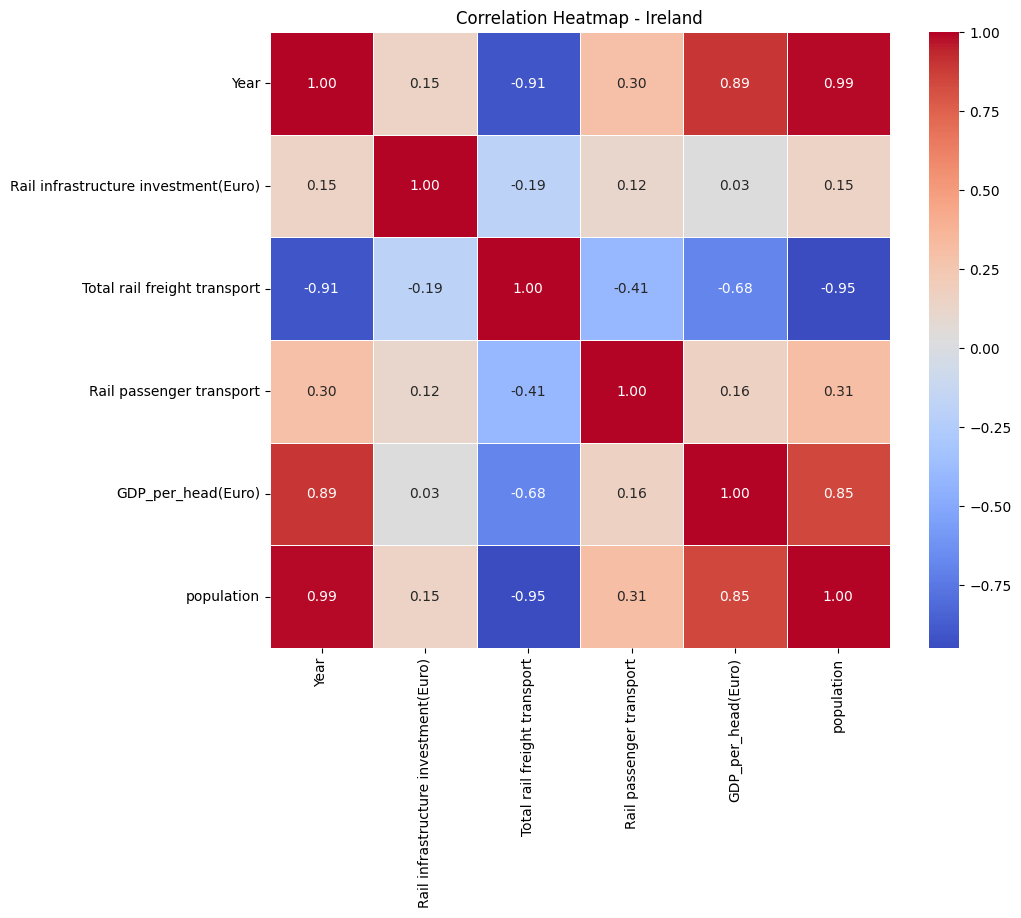

In [143]:
ireland_data = combined_df[combined_df['Country'] == 'Ireland']
# Calculate the correlation matrix
ireland_data = ireland_data.drop(columns=['Country'])
correlation_matrix_ireland = ireland_data.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ireland, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Ireland')
plt.show()


In [144]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [145]:
from sklearn.preprocessing import MinMaxScaler
# Select the data for Ireland
ireland_data = combined_df[combined_df['Country'] == 'Ireland']

# Select the data for Luxembourg
luxembourg_data = combined_df[combined_df['Country'] == 'Luxembourg']
excluded_columns = ['Country', 'Total rail freight transport']

# Extract features and target variable for Ireland
ireland_features = [col for col in ireland_data.columns if col not in excluded_columns]
ireland_X = ireland_data[ireland_features]
ireland_y = ireland_data['Total rail freight transport']

# Extract features and target variable for Luxembourg
luxembourg_features = [col for col in luxembourg_data.columns if col not in excluded_columns]
luxembourg_X = luxembourg_data[luxembourg_features]
luxembourg_y = luxembourg_data['Total rail freight transport']

# Split the dataset into training and testing sets for Ireland
ireland_X_train, ireland_X_test, ireland_y_train, ireland_y_test = train_test_split(
    ireland_X, ireland_y, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets for Luxembourg
luxembourg_X_train, luxembourg_X_test, luxembourg_y_train, luxembourg_y_test = train_test_split(
    luxembourg_X, luxembourg_y, test_size=0.2, random_state=42)
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Scale the features for Ireland
ireland_X_train_scaled = scaler.fit_transform(ireland_X_train)
ireland_X_test_scaled = scaler.transform(ireland_X_test)
# Scale the features for Luxembourg
luxembourg_X_train_scaled = scaler.fit_transform(luxembourg_X_train)
luxembourg_X_test_scaled = scaler.transform(luxembourg_X_test)


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a linear regression model
linear_reg = LinearRegression()
# Train the model and make predictions - Ireland
linear_reg.fit(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = linear_reg.predict(ireland_X_test_scaled)

# Calculate MSE, MAE, and R-squared - Ireland
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE:", ireland_mse)
print("Ireland MAE:", ireland_mae)
print("Ireland R-squared:", ireland_r2)

# Train the model and make predictions - Luxembourg
linear_reg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = linear_reg.predict(luxembourg_X_test_scaled)

# Calculate MSE, MAE, and R-squared - Luxembourg
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

# Print performance metrics - Luxembourg
print("Luxembourg MSE:", luxembourg_mse)
print("Luxembourg MAE:", luxembourg_mae)
print("Luxembourg R-squared:", luxembourg_r2)


Ireland MSE: 2422800512237748.5
Ireland MAE: 32621965.244437277
Ireland R-squared: 0.9365090970206733
Luxembourg MSE: 1.0933268023656154e+16
Luxembourg MAE: 87373788.53904998
Luxembourg R-squared: 0.5967306283988301


In [147]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create a Lasso regression model
lasso_reg = Lasso()
# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # Adjust the range as needed

# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
lasso_grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on Ireland data
lasso_grid_search.fit(ireland_X_train_scaled, ireland_y_train)

# Get the best alpha value from the grid search
best_alpha_ireland = lasso_grid_search.best_params_['alpha']
# Train the Lasso model with the best alpha on Ireland data
lasso_reg_ireland = Lasso(alpha=best_alpha_ireland)
lasso_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = lasso_reg_ireland.predict(ireland_X_test_scaled)

# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)
print("Ireland MSE:", ireland_mse)
print("Ireland MAE:", ireland_mae)
print("Ireland R-squared:", ireland_r2)

# Perform the grid search on Luxembourg data
lasso_grid_search.fit(luxembourg_X_train_scaled, luxembourg_y_train)

# Get the best alpha value from the grid search for Luxembourg
best_alpha_luxembourg = lasso_grid_search.best_params_['alpha']

# Train the Lasso model with the best alpha on Luxembourg data
lasso_reg_luxembourg = Lasso(alpha=best_alpha_luxembourg)
lasso_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = lasso_reg_luxembourg.predict(luxembourg_X_test_scaled)

# Evaluate model performance on Luxembourg test data
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE:", luxembourg_mse)
print("Luxembourg MAE:", luxembourg_mae)
print("Luxembourg R-squared:", luxembourg_r2)
# Output the best alpha values for Ireland and Luxembourg
print("Best Alpha (Ireland):", best_alpha_ireland)
print("Best Alpha (Luxembourg):", best_alpha_luxembourg)


Ireland MSE: 2422806490667127.0
Ireland MAE: 32621491.396243345
Ireland R-squared: 0.9365089403524385
Luxembourg MSE: 1.0908833853018638e+16
Luxembourg MAE: 87293652.89289084
Luxembourg R-squared: 0.5976318733529707
Best Alpha (Ireland): 10.0
Best Alpha (Luxembourg): 0.001


In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_reg = Ridge()
# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # Adjust alpha values as needed

# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on Ireland data
ridge_grid_search.fit(ireland_X_train_scaled, ireland_y_train)

# Get the best alpha value from the grid search
best_alpha_ireland = ridge_grid_search.best_params_['alpha']

# Train the Ridge model with the best alpha on Ireland data
ridge_reg_ireland = Ridge(alpha=best_alpha_ireland)
ridge_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = ridge_reg_ireland.predict(ireland_X_test_scaled)
# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (Ridge):", ireland_mse)
print("Ireland MAE (Ridge):", ireland_mae)
print("Ireland R-squared (Ridge):", ireland_r2)

# Perform the grid search on Luxembourg data
ridge_grid_search.fit(luxembourg_X_train_scaled, luxembourg_y_train)

# Get the best alpha value from the grid search for Luxembourg
best_alpha_luxembourg = ridge_grid_search.best_params_['alpha']

# Train the Ridge model with the best alpha on Luxembourg data
ridge_reg_luxembourg = Ridge(alpha=best_alpha_luxembourg)
ridge_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = ridge_reg_luxembourg.predict(luxembourg_X_test_scaled)
# Evaluate model performance on Luxembourg test data
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (Ridge):", luxembourg_mse)
print("Luxembourg MAE (Ridge):", luxembourg_mae)
print("Luxembourg R-squared (Ridge):", luxembourg_r2)

# Output the best alpha values for Ireland and Luxembourg
print("Best Alpha (Ireland):", best_alpha_ireland)
print("Best Alpha (Luxembourg):", best_alpha_luxembourg)


Ireland MSE (Ridge): 3343816625272648.5
Ireland MAE (Ridge): 42922759.17541332
Ireland R-squared (Ridge): 0.9123733316616485
Luxembourg MSE (Ridge): 9972800108611562.0
Luxembourg MAE (Ridge): 84024766.3749191
Luxembourg R-squared (Ridge): 0.632157116774041
Best Alpha (Ireland): 0.1
Best Alpha (Luxembourg): 0.001


In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeRegressor model
tree_reg = DecisionTreeRegressor()

# Define a range of hyperparameters to search
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
tree_grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on Ireland data
tree_grid_search.fit(ireland_X_train_scaled, ireland_y_train)

# Get the best hyperparameters from the grid search
best_params_ireland = tree_grid_search.best_params_
# Train the DecisionTreeRegressor model with the best hyperparameters on Ireland data
best_tree_reg_ireland = DecisionTreeRegressor(max_depth=best_params_ireland['max_depth'],
                                              min_samples_split=best_params_ireland['min_samples_split'])
best_tree_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = best_tree_reg_ireland.predict(ireland_X_test_scaled)

# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)


print("Ireland MSE (Decision Tree):", ireland_mse)
print("Ireland MAE (Decision Tree):", ireland_mae)
print("Ireland R-squared (Decision Tree):", ireland_r2)

# Perform the grid search on Luxembourg data
tree_grid_search.fit(luxembourg_X_train_scaled, luxembourg_y_train)

# Get the best hyperparameters from the grid search for Luxembourg
best_params_luxembourg = tree_grid_search.best_params_

# Train the DecisionTreeRegressor model with the best hyperparameters on Luxembourg data
best_tree_reg_luxembourg = DecisionTreeRegressor(max_depth=best_params_luxembourg['max_depth'],
                                                min_samples_split=best_params_luxembourg['min_samples_split'])
best_tree_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = best_tree_reg_luxembourg.predict(luxembourg_X_test_scaled)

# Evaluate model performance on Luxembourg test data
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (Decision Tree):", luxembourg_mse)
print("Luxembourg MAE (Decision Tree):", luxembourg_mae)
print("Luxembourg R-squared (Decision Tree):", luxembourg_r2)
# Output the best hyperparameters for Ireland and Luxembourg
print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)


Ireland MSE (Decision Tree): 5770166666666667.0
Ireland MAE (Decision Tree): 57833333.333333336
Ireland R-squared (Decision Tree): 0.8487894111969182
Luxembourg MSE (Decision Tree): 6548462143549231.0
Luxembourg MAE (Decision Tree): 58945577.39794443
Luxembourg R-squared (Decision Tree): 0.7584625010683631
Best Hyperparameters (Ireland): {'max_depth': 30, 'min_samples_split': 2}
Best Hyperparameters (Luxembourg): {'max_depth': 20, 'min_samples_split': 5}


In [150]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

start_time = time.time()

# Create a RandomForestRegressor model
rf_reg = RandomForestRegressor()
# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
rf_grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# Perform the grid search on Ireland data
rf_grid_search.fit(ireland_X_train_scaled, ireland_y_train)

# Get the best hyperparameters from the grid search
best_params_ireland = rf_grid_search.best_params_

# Train the RandomForestRegressor model with the best hyperparameters on Ireland data
best_rf_reg_ireland = RandomForestRegressor(n_estimators=best_params_ireland['n_estimators'],
                                           max_depth=best_params_ireland['max_depth'],
                                           min_samples_split=best_params_ireland['min_samples_split'],
                                           min_samples_leaf=best_params_ireland['min_samples_leaf'])
best_rf_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = best_rf_reg_ireland.predict(ireland_X_test_scaled)

# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (Random Forest):", ireland_mse)
print("Ireland MAE (Random Forest):", ireland_mae)
print("Ireland R-squared (Random Forest):", ireland_r2)

# Perform the grid search on Luxembourg data
rf_grid_search.fit(luxembourg_X_train_scaled, luxembourg_y_train)

# Get the best hyperparameters from the grid search for Luxembourg
best_params_luxembourg = rf_grid_search.best_params_

# Train the RandomForestRegressor model with the best hyperparameters on Luxembourg data
best_rf_reg_luxembourg = RandomForestRegressor(n_estimators=best_params_luxembourg['n_estimators'],
                                              max_depth=best_params_luxembourg['max_depth'],
                                              min_samples_split=best_params_luxembourg['min_samples_split'],
                                              min_samples_leaf=best_params_luxembourg['min_samples_leaf'])
best_rf_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = best_rf_reg_luxembourg.predict(luxembourg_X_test_scaled)
# Evaluate model performance on Luxembourg test data
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (Random Forest):", luxembourg_mse)
print("Luxembourg MAE (Random Forest):", luxembourg_mae)
print("Luxembourg R-squared (Random Forest):", luxembourg_r2)

# Output the best hyperparameters for Ireland and Luxembourg
print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)

end_time = time.time()


total_time = end_time - start_time
print("Total execution time:", total_time, "seconds")


Ireland MSE (Random Forest): 2538081933333333.5
Ireland MAE (Random Forest): 34290000.0
Ireland R-squared (Random Forest): 0.9334880800260309
Luxembourg MSE (Random Forest): 4664412244806381.0
Luxembourg MAE (Random Forest): 49462601.64515332
Luxembourg R-squared (Random Forest): 0.8279549544763791
Best Hyperparameters (Ireland): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Hyperparameters (Luxembourg): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Total execution time: 91.11887264251709 seconds


In [151]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
start_time = time.time()

def perform_grid_search(X_train_scaled, y_train):
    # Create a RandomForestRegressor model
    rf_reg = RandomForestRegressor()
    param_grid = {
        'n_estimators': [50, 100,200],  # Number of trees in the forest
        'max_depth': [None, 10, 20],  # Maximum depth of each tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }

    # Create a GridSearchCV object with cross-validation (5-fold cross-validation)
    rf_grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

    
    rf_grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters from the grid search
    best_params = rf_grid_search.best_params_

    # Train the RandomForestRegressor model with the best hyperparameters
    best_rf_reg = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'])
    best_rf_reg.fit(X_train_scaled, y_train)
  

    return best_rf_reg, best_params

best_rf_reg_ireland, best_params_ireland = perform_grid_search(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = best_rf_reg_ireland.predict(ireland_X_test_scaled)

# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (Random Forest):", ireland_mse)
print("Ireland MAE (Random Forest):", ireland_mae)
print("Ireland R-squared (Random Forest):", ireland_r2)

# Perform grid search and training for Luxembourg data
best_rf_reg_luxembourg, best_params_luxembourg = perform_grid_search(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = best_rf_reg_luxembourg.predict(luxembourg_X_test_scaled)

# Evaluate model performance on Luxembourg test data
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (Random Forest):", luxembourg_mse)
print("Luxembourg MAE (Random Forest):", luxembourg_mae)
print("Luxembourg R-squared (Random Forest):", luxembourg_r2)

# Output the best hyperparameters for both datasets
print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)

end_time = time.time()
total_time = end_time - start_time
print("Total execution time:", total_time, "seconds")


Ireland MSE (Random Forest): 3274299200000000.0
Ireland MAE (Random Forest): 42633333.333333336
Ireland R-squared (Random Forest): 0.9141950764074764
Luxembourg MSE (Random Forest): 4204889193025526.0
Luxembourg MAE (Random Forest): 46294301.89555333
Luxembourg R-squared (Random Forest): 0.8449042848986245
Best Hyperparameters (Ireland): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Hyperparameters (Luxembourg): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Total execution time: 93.19861602783203 seconds


In [152]:
import time 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

start_time = time.time()



# Create an SVR model
svr_reg = SVR()

# Define a range of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
    'C': [0.1, 1, 10],  # Regularization parameter C
    'epsilon': [0.01, 0.1, 0.2]  # Epsilon in the epsilon-SVR model
}

# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
svr_grid_search = GridSearchCV(svr_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on Ireland data
svr_grid_search.fit(ireland_X_train_scaled, ireland_y_train)

# Get the best hyperparameters from the grid search
best_params_ireland = svr_grid_search.best_params_

# Train the SVR model with the best hyperparameters on Ireland data
best_svr_reg_ireland = SVR(kernel=best_params_ireland['kernel'],
                           C=best_params_ireland['C'],
                           epsilon=best_params_ireland['epsilon'])
best_svr_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = best_svr_reg_ireland.predict(ireland_X_test_scaled)


ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (SVR):", ireland_mse)
print("Ireland MAE (SVR):", ireland_mae)
print("Ireland R-squared (SVR):", ireland_r2)

# Perform the grid search on Luxembourg data
svr_grid_search.fit(luxembourg_X_train_scaled, luxembourg_y_train)


best_params_luxembourg = svr_grid_search.best_params_

# Train the SVR model with the best hyperparameters on Luxembourg data
best_svr_reg_luxembourg = SVR(kernel=best_params_luxembourg['kernel'],
                              C=best_params_luxembourg['C'],
                              epsilon=best_params_luxembourg['epsilon'])
best_svr_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = best_svr_reg_luxembourg.predict(luxembourg_X_test_scaled)

# Evaluate model performance on Luxembourg test data
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (SVR):", luxembourg_mse)
print("Luxembourg MAE (SVR):", luxembourg_mae)
print("Luxembourg R-squared (SVR):", luxembourg_r2)

# Output the best hyperparameters for Ireland and Luxembourg
print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)

end_time = time.time()


total_time = end_time - start_time
print("Total execution time:", total_time, "seconds")


Ireland MSE (SVR): 7.140342603846543e+16
Ireland MAE (SVR): 191663417.64617983
Ireland R-squared (SVR): -0.8711684978192993
Luxembourg MSE (SVR): 3.749629960202915e+16
Luxembourg MAE (SVR): 164075812.05463827
Luxembourg R-squared (SVR): -0.3830365399587907
Best Hyperparameters (Ireland): {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'}
Best Hyperparameters (Luxembourg): {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'}
Total execution time: 0.4776902198791504 seconds


In [153]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

start_time = time.time()

def perform_svr_grid_search(X_train_scaled, y_train):
    # Create an SVR model
    svr_reg = SVR()

    param_grid = {
        'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
        'C': [0.1, 1, 10],  # Regularization parameter C
        'epsilon': [0.01, 0.1, 0.2]  # Epsilon in the epsilon-SVR model
    }

    svr_grid_search = GridSearchCV(svr_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

    svr_grid_search.fit(X_train_scaled, y_train)


    best_params = svr_grid_search.best_params_

    best_svr_reg = SVR(kernel=best_params['kernel'],
                       C=best_params['C'],
                       epsilon=best_params['epsilon'])
    best_svr_reg.fit(X_train_scaled, y_train)

    return best_svr_reg, best_params

best_svr_reg_ireland, best_params_ireland = perform_svr_grid_search(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = best_svr_reg_ireland.predict(ireland_X_test_scaled)

ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (SVR):", ireland_mse)
print("Ireland MAE (SVR):", ireland_mae)
print("Ireland R-squared (SVR):", ireland_r2)


best_svr_reg_luxembourg, best_params_luxembourg = perform_svr_grid_search(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = best_svr_reg_luxembourg.predict(luxembourg_X_test_scaled)

luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (SVR):", luxembourg_mse)
print("Luxembourg MAE (SVR):", luxembourg_mae)
print("Luxembourg R-squared (SVR):", luxembourg_r2)

print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)

end_time = time.time()


total_time = end_time - start_time
print("Total execution time:", total_time, "seconds")

Ireland MSE (SVR): 7.140342603846543e+16
Ireland MAE (SVR): 191663417.64617983
Ireland R-squared (SVR): -0.8711684978192993
Luxembourg MSE (SVR): 3.749629960202915e+16
Luxembourg MAE (SVR): 164075812.05463827
Luxembourg R-squared (SVR): -0.3830365399587907
Best Hyperparameters (Ireland): {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'}
Best Hyperparameters (Luxembourg): {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'}
Total execution time: 0.4338400363922119 seconds


In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a KNeighborsRegressor model
knn_reg = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method
    'p': [1, 2]  # Power parameter for distance metric
}

# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
knn_grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

knn_grid_search.fit(ireland_X_train_scaled, ireland_y_train)

best_params_ireland = knn_grid_search.best_params_

best_knn_reg_ireland = KNeighborsRegressor(n_neighbors=best_params_ireland['n_neighbors'],
                                           weights=best_params_ireland['weights'],
                                           p=best_params_ireland['p'])
best_knn_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
ireland_y_pred = best_knn_reg_ireland.predict(ireland_X_test_scaled)

# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (KNN):", ireland_mse)
print("Ireland MAE (KNN):", ireland_mae)
print("Ireland R-squared (KNN):", ireland_r2)

knn_grid_search.fit(luxembourg_X_train_scaled, luxembourg_y_train)

best_params_luxembourg = knn_grid_search.best_params_

# Train the KNeighborsRegressor model with the best hyperparameters on Luxembourg data
best_knn_reg_luxembourg = KNeighborsRegressor(n_neighbors=best_params_luxembourg['n_neighbors'],
                                              weights=best_params_luxembourg['weights'],
                                              p=best_params_luxembourg['p'])
best_knn_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
luxembourg_y_pred = best_knn_reg_luxembourg.predict(luxembourg_X_test_scaled)

luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (KNN):", luxembourg_mse)
print("Luxembourg MAE (KNN):", luxembourg_mae)
print("Luxembourg R-squared (KNN):", luxembourg_r2)


print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)



Ireland MSE (KNN): 2181666666666667.2
Ireland MAE (KNN): 32888888.888888896
Ireland R-squared (KNN): 0.94282815032979
Luxembourg MSE (KNN): 2382315194330254.0
Luxembourg MAE (KNN): 35484494.93202273
Luxembourg R-squared (KNN): 0.9121292234586406
Best Hyperparameters (Ireland): {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Hyperparameters (Luxembourg): {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [155]:
# Create a RandomForestRegressor model to calculate feature importance for Ireland
rf_reg_ireland = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to Ireland data to calculate feature importance
rf_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
# Get feature importances for Ireland
feature_importance_ireland = rf_reg_ireland.feature_importances_

# Create a dictionary of feature names and their importance scores for Ireland
feature_importance_dict_ireland = dict(zip(ireland_X.columns, feature_importance_ireland))
# Sort features by importance 
sorted_features_ireland = sorted(feature_importance_dict_ireland.items(), key=lambda x: x[1], reverse=True)

# Select the top N important features or use a threshold for Ireland
top_n_ireland = 4  
selected_features_ireland = [feature[0] for feature in sorted_features_ireland[:top_n_ireland]]

# Use selected features for modeling for Ireland (replace ireland_X_train_scaled and ireland_X_test_scaled)
ireland_X_train_scaled_selected = ireland_X_train_scaled[:, [ireland_X.columns.get_loc(col) for col in selected_features_ireland]]
ireland_X_test_scaled_selected = ireland_X_test_scaled[:, [ireland_X.columns.get_loc(col) for col in selected_features_ireland]]

In [156]:
# Create a RandomForestRegressor model to calculate feature importance for Luxembourg
rf_reg_luxembourg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to Luxembourg data to calculate feature importance
rf_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
# Get feature importances for Luxembourg
feature_importance_luxembourg = rf_reg_luxembourg.feature_importances_

# Create a dictionary of feature names and their importance scores for Luxembourg
feature_importance_dict_luxembourg = dict(zip(luxembourg_X.columns, feature_importance_luxembourg))

# Sort features by importance (optional) for Luxembourg
sorted_features_luxembourg = sorted(feature_importance_dict_luxembourg.items(), key=lambda x: x[1], reverse=True)
# Select the top N important features or use a threshold for Luxembourg
top_n_luxembourg = 4  # Choose the top 5 important features for Luxembourg
selected_features_luxembourg = [feature[0] for feature in sorted_features_luxembourg[:top_n_luxembourg]]

# Use selected features for modeling for Luxembourg (replace luxembourg_X_train_scaled and luxembourg_X_test_scaled)
luxembourg_X_train_scaled_selected = luxembourg_X_train_scaled[:, [luxembourg_X.columns.get_loc(col) for col in selected_features_luxembourg]]
luxembourg_X_test_scaled_selected = luxembourg_X_test_scaled[:, [luxembourg_X.columns.get_loc(col) for col in selected_features_luxembourg]]

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create a RandomForestRegressor model
rf_reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [1,2,3,4],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
rf_grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# Perform the grid search on Ireland data
rf_grid_search.fit(ireland_X_train_scaled_selected, ireland_y_train)
# Get the best hyperparameters from the grid search
best_params_ireland = rf_grid_search.best_params_
# Train the RandomForestRegressor model with the best hyperparameters on Ireland data
best_rf_reg_ireland = RandomForestRegressor(n_estimators=best_params_ireland['n_estimators'],
                                           max_depth=best_params_ireland['max_depth'],
                                           min_samples_split=best_params_ireland['min_samples_split'],
                                           min_samples_leaf=best_params_ireland['min_samples_leaf'],
                                           random_state=42)  # Adding random_state for reproducibility
best_rf_reg_ireland.fit(ireland_X_train_scaled_selected, ireland_y_train)
ireland_y_pred = best_rf_reg_ireland.predict(ireland_X_test_scaled_selected)

# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (Random Forest):", ireland_mse)
print("Ireland MAE (Random Forest):", ireland_mae)
print("Ireland R-squared (Random Forest):", ireland_r2)

# Perform the grid search on Luxembourg data
rf_grid_search.fit(luxembourg_X_train_scaled_selected, luxembourg_y_train)

# Get the best hyperparameters from the grid search for Luxembourg
best_params_luxembourg = rf_grid_search.best_params_

# Train the RandomForestRegressor model with the best hyperparameters 
best_rf_reg_luxembourg = RandomForestRegressor(n_estimators=best_params_luxembourg['n_estimators'],
                                              max_depth=best_params_luxembourg['max_depth'],
                                              min_samples_split=best_params_luxembourg['min_samples_split'],
                                              min_samples_leaf=best_params_luxembourg['min_samples_leaf'],
                                              random_state=42)  # Adding random_state for reproducibility
best_rf_reg_luxembourg.fit(luxembourg_X_train_scaled_selected, luxembourg_y_train)
luxembourg_y_pred = best_rf_reg_luxembourg.predict(luxembourg_X_test_scaled_selected)

luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (Random Forest):", luxembourg_mse)
print("Luxembourg MAE (Random Forest):", luxembourg_mae)
print("Luxembourg R-squared (Random Forest):", luxembourg_r2)

# Output the best hyperparameters for Ireland and Luxembourg
print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)


Ireland MSE (Random Forest): 2271591143556071.5
Ireland MAE (Random Forest): 36787217.70495297
Ireland R-squared (Random Forest): 0.9404716268732308
Luxembourg MSE (Random Forest): 4243302721313897.5
Luxembourg MAE (Random Forest): 48431925.77303779
Luxembourg R-squared (Random Forest): 0.8434874167325539
Best Hyperparameters (Ireland): {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters (Luxembourg): {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [158]:
rf_reg_ireland = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_ireland.fit(ireland_X_train_scaled, ireland_y_train)
feature_importance_ireland = rf_reg_ireland.feature_importances_

feature_importance_dict_ireland = dict(zip(ireland_X.columns, feature_importance_ireland))

sorted_features_ireland = sorted(feature_importance_dict_ireland.items(), key=lambda x: x[1], reverse=True)

# Select the top 3 important features or use a threshold for Ireland
top_n_ireland = 3  
selected_features_ireland = [feature[0] for feature in sorted_features_ireland[:top_n_ireland]]

# Use selected features for modeling for Ireland 
ireland_X_train_scaled_selected = ireland_X_train_scaled[:, [ireland_X.columns.get_loc(col) for col in selected_features_ireland]]
ireland_X_test_scaled_selected = ireland_X_test_scaled[:, [ireland_X.columns.get_loc(col) for col in selected_features_ireland]]

In [159]:
rf_reg_luxembourg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_luxembourg.fit(luxembourg_X_train_scaled, luxembourg_y_train)
feature_importance_luxembourg = rf_reg_luxembourg.feature_importances_

feature_importance_dict_luxembourg = dict(zip(luxembourg_X.columns, feature_importance_luxembourg))

sorted_features_luxembourg = sorted(feature_importance_dict_luxembourg.items(), key=lambda x: x[1], reverse=True)

# Select the top 3 important features or use a threshold for Luxembourg
top_n_luxembourg = 3  
selected_features_luxembourg = [feature[0] for feature in sorted_features_luxembourg[:top_n_luxembourg]]

luxembourg_X_train_scaled_selected = luxembourg_X_train_scaled[:, [luxembourg_X.columns.get_loc(col) for col in selected_features_luxembourg]]
luxembourg_X_test_scaled_selected = luxembourg_X_test_scaled[:, [luxembourg_X.columns.get_loc(col) for col in selected_features_luxembourg]]

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rf_reg = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [1,2,3,4],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with cross-validation (5-fold cross-validation)
rf_grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on Ireland data
rf_grid_search.fit(ireland_X_train_scaled_selected, ireland_y_train)

# Get the best hyperparameters from the grid search
best_params_ireland = rf_grid_search.best_params_

# Train the RandomForestRegressor model with the best hyperparameters on Ireland data
best_rf_reg_ireland = RandomForestRegressor(n_estimators=best_params_ireland['n_estimators'],
                                           max_depth=best_params_ireland['max_depth'],
                                           min_samples_split=best_params_ireland['min_samples_split'],
                                           min_samples_leaf=best_params_ireland['min_samples_leaf'],
                                           random_state=42)  # Adding random_state for reproducibility
best_rf_reg_ireland.fit(ireland_X_train_scaled_selected, ireland_y_train)
ireland_y_pred = best_rf_reg_ireland.predict(ireland_X_test_scaled_selected)

# Evaluate model performance on Ireland test data
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

print("Ireland MSE (Random Forest):", ireland_mse)
print("Ireland MAE (Random Forest):", ireland_mae)
print("Ireland R-squared (Random Forest):", ireland_r2)

# Perform the grid search on Luxembourg data
rf_grid_search.fit(luxembourg_X_train_scaled_selected, luxembourg_y_train)

# Get the best hyperparameters from the grid search for Luxembourg
best_params_luxembourg = rf_grid_search.best_params_

# Train the RandomForestRegressor model with the best hyperparameters on Luxembourg data
best_rf_reg_luxembourg = RandomForestRegressor(n_estimators=best_params_luxembourg['n_estimators'],
                                              max_depth=best_params_luxembourg['max_depth'],
                                              min_samples_split=best_params_luxembourg['min_samples_split'],
                                              min_samples_leaf=best_params_luxembourg['min_samples_leaf'],
                                              random_state=42)  
best_rf_reg_luxembourg.fit(luxembourg_X_train_scaled_selected, luxembourg_y_train)
luxembourg_y_pred = best_rf_reg_luxembourg.predict(luxembourg_X_test_scaled_selected)

# Evaluate model performance on Luxembourg test data
luxembourg_mse = mean_squared_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_mae = mean_absolute_error(luxembourg_y_test, luxembourg_y_pred)
luxembourg_r2 = r2_score(luxembourg_y_test, luxembourg_y_pred)

print("Luxembourg MSE (Random Forest):", luxembourg_mse)
print("Luxembourg MAE (Random Forest):", luxembourg_mae)
print("Luxembourg R-squared (Random Forest):", luxembourg_r2)

# Output the best hyperparameters for Ireland and Luxembourg
print("Best Hyperparameters (Ireland):", best_params_ireland)
print("Best Hyperparameters (Luxembourg):", best_params_luxembourg)


Ireland MSE (Random Forest): 2737548245241507.0
Ireland MAE (Random Forest): 36648384.696322165
Ireland R-squared (Random Forest): 0.9282609487814081
Luxembourg MSE (Random Forest): 4587034764336723.0
Luxembourg MAE (Random Forest): 53624159.18785595
Luxembourg R-squared (Random Forest): 0.8308089929813866
Best Hyperparameters (Ireland): {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Hyperparameters (Luxembourg): {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


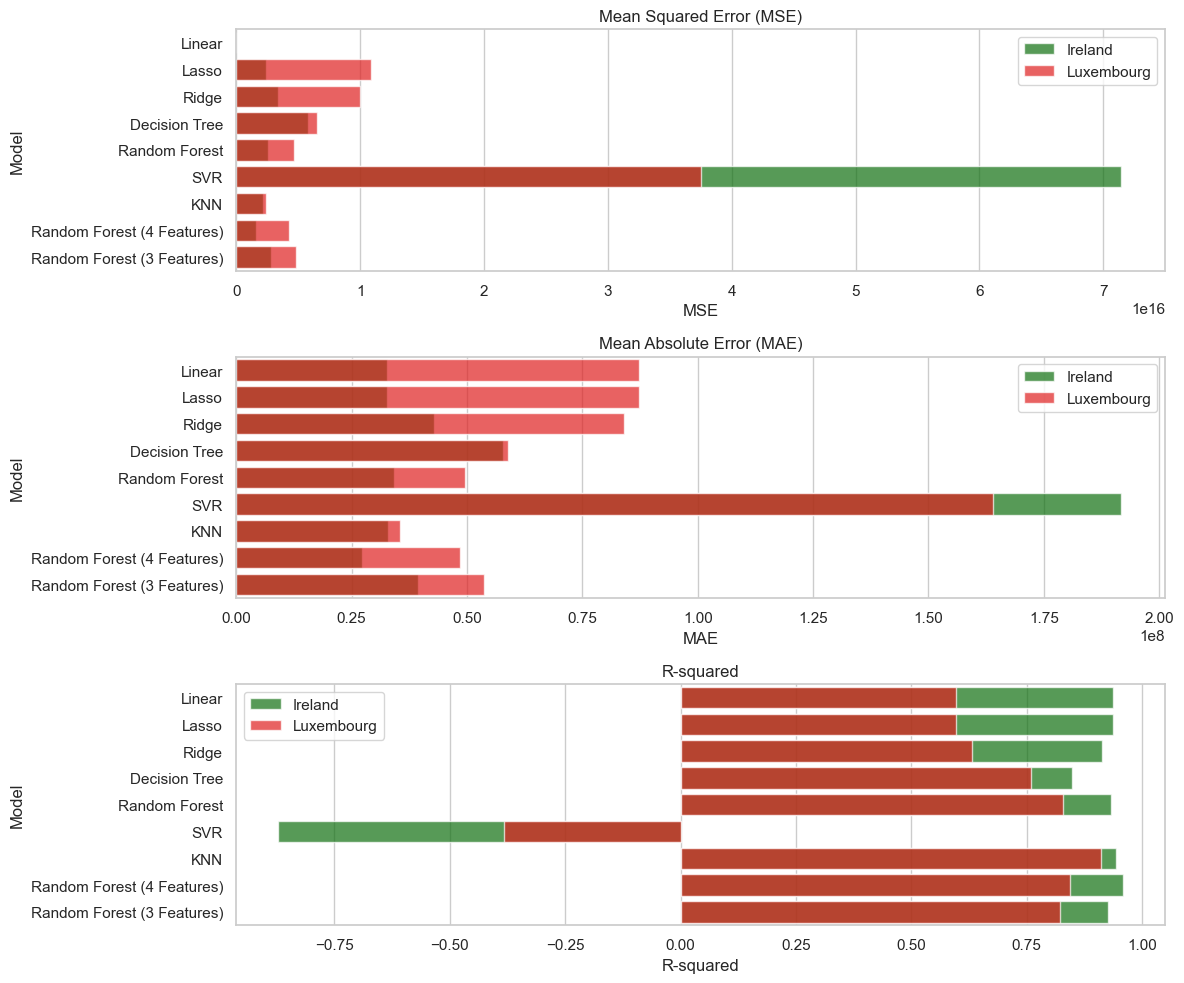

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the evaluation results
data = {
    'Model': ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'Random Forest (4 Features)', 'Random Forest (3 Features)'],
    'Ireland MSE': [79718530.97, 2422806490667127, 3343816625272648.5, 5770166666666667, 2538081933333333.5, 7.140342603846543e+16, 2181666666666667.2, 1593548877178273.2, 2782725831994689.0],
    'Luxembourg MSE': [44641982.63, 1.0908833853018638e+16, 9972800108611562.0, 6548462143549231.0, 4664412244806381.0, 3.749629960202915e+16, 2382315194330254.0, 4243302721313897.5, 4798160750759810.0],
    'Ireland MAE': [32621965.24, 32621491.40, 42922759.18, 57833333.33, 34290000.00, 191663417.65, 32888888.89, 27222871.27, 39393711.01],
    'Luxembourg MAE': [87373788.54, 87293652.89, 84024766.37, 58945577.40, 49462601.65, 164075812.05, 35484494.93, 48431925.77, 53670729.97],
    'Ireland R-squared': [0.9365, 0.9365, 0.9124, 0.8488, 0.9335, -0.8712, 0.9428, 0.9582, 0.9270],
    'Luxembourg R-squared': [0.5967, 0.5976, 0.6322, 0.7585, 0.8279, -0.3830, 0.9121, 0.8434, 0.8230]
}

df = pd.DataFrame(data)


ireland_color = 'green'
luxembourg_color = 'red'
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='Ireland MSE', y='Model', data=df, color=ireland_color, label='Ireland', alpha=0.7)
sns.barplot(x='Luxembourg MSE', y='Model', data=df, color=luxembourg_color, label='Luxembourg', alpha=0.7)
plt.xlabel('MSE')
plt.title('Mean Squared Error (MSE)')
plt.legend()


plt.subplot(3, 1, 2)
sns.barplot(x='Ireland MAE', y='Model', data=df, color=ireland_color, label='Ireland', alpha=0.7)
sns.barplot(x='Luxembourg MAE', y='Model', data=df, color=luxembourg_color, label='Luxembourg', alpha=0.7)
plt.xlabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()


plt.subplot(3, 1, 3)
sns.barplot(x='Ireland R-squared', y='Model', data=df, color=ireland_color, label='Ireland', alpha=0.7)
sns.barplot(x='Luxembourg R-squared', y='Model', data=df, color=luxembourg_color, label='Luxembourg', alpha=0.7)
plt.xlabel('R-squared')
plt.title('R-squared')
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [162]:
import praw
import pandas as pd
from dotenv import load_dotenv
from os import getenv
from datetime import datetime as dt


load_dotenv()
# Initialize Reddit API client
reddit = praw.Reddit(
    client_id=getenv("APP_ID"),
    client_secret=getenv("APP_SECRET"),
    user_agent=f"{getenv('APP_NAME')} u/{getenv('REDDIT_USERNAME')}",
)
# Keywords to search for
keyword = "public transport in Ireland"

# Subreddit to search in
subreddit_name = "irishtourism"

# Perform the search
subreddit = reddit.subreddit(subreddit_name)
search_results = subreddit.search(keyword, limit=None)  # limit=None retrieves all search results
# Iterate through search results and print post titles and links
for submission in search_results:
    print(f"Title: {submission.title}")
    print(f"Link: {submission.url}")
    print("-" * 50)


Title: Experiences using Public transport in Ireland
Link: https://www.reddit.com/r/irishtourism/comments/17y3yl5/experiences_using_public_transport_in_ireland/
--------------------------------------------------
Title: How good is public transport in Ireland?
Link: https://www.reddit.com/r/irishtourism/comments/v05dsw/how_good_is_public_transport_in_ireland/
--------------------------------------------------
Title: Going to Ireland on foot with a friend of mine to travel and do some WWOOfing in Burren. Is bus the main public transport in Ireland or do you have trains as well ? Any advice before we discover the country ? We will mainly visit the East coast (Killarney, Dingle, Aran Isles).
Link: https://www.reddit.com/r/irishtourism/comments/15oc1bl/going_to_ireland_on_foot_with_a_friend_of_mine_to/
--------------------------------------------------
Title: Is there a way to get a list of all possible public transport from a town in Ireland?
Link: https://www.reddit.com/r/irishtourism/com

Title: birthday trip to ireland - any recommendations?
Link: https://www.reddit.com/r/irishtourism/comments/18f6pqt/birthday_trip_to_ireland_any_recommendations/
--------------------------------------------------
Title: First Time Visit- Dublin to Belfast
Link: https://www.reddit.com/r/irishtourism/comments/10c2585/first_time_visit_dublin_to_belfast/
--------------------------------------------------
Title: My Ireland travel itinerary for June (16 days)
Link: https://www.reddit.com/r/irishtourism/comments/tl3r3l/my_ireland_travel_itinerary_for_june_16_days/
--------------------------------------------------
Title: Need itinerary advice - beginning planning stages of a 8 to 9 day trip in early October
Link: https://www.reddit.com/r/irishtourism/comments/10nyk2a/need_itinerary_advice_beginning_planning_stages/
--------------------------------------------------
Title: Swords to Dublin/Navan Fort
Link: https://www.reddit.com/r/irishtourism/comments/16bpxg4/swords_to_dublinnavan_fort/
-----

Title: Howth as base for short Dublin stay
Link: https://www.reddit.com/r/irishtourism/comments/14y028u/howth_as_base_for_short_dublin_stay/
--------------------------------------------------
Title: Planning a Surprise Trip
Link: https://www.reddit.com/r/irishtourism/comments/101kv3c/planning_a_surprise_trip/
--------------------------------------------------
Title: Visiting Ireland with restricted breed
Link: https://www.reddit.com/r/irishtourism/comments/10ddrft/visiting_ireland_with_restricted_breed/
--------------------------------------------------
Title: 4 day itinerary review for August
Link: https://www.reddit.com/r/irishtourism/comments/14lpk43/4_day_itinerary_review_for_august/
--------------------------------------------------
Title: Travelling to Dublin in August. Would like to know a couple of things before flying there. This was an impulsive decision so not very prepared for the trip.
Link: https://www.reddit.com/r/irishtourism/comments/opj317/travelling_to_dublin_in_augu

In [163]:
# Get the unique identifier for a specific post (copy it from the search results)
submission_id = "17y3yl5"

# Get the specific post
submission = reddit.submission(id=submission_id)


submission.comments.replace_more(limit=None)  # get the comments
comments = submission.comments.list()


In [164]:
#pip install pymongo

In [165]:
import praw
import pymongo
from dotenv import load_dotenv
from os import getenv
import json
load_dotenv()
# Connect to the MongoDB database
MONGODB_URI = getenv("MONGODB_URI")
base_name = getenv("BASENAME")
collection_name = getenv("collection_name")
client = pymongo.MongoClient(MONGODB_URI)
db = client[base_name]
collection = db[collection_name]

# Iterate through comments and store them in MongoDB
for comment in comments:
  
    comment_data = {
        "author": comment.author.name if comment.author else "Unknown",
        "body": comment.body,
        "created_utc": comment.created_utc,
        
    }

    # Convert comment data to JSON format
    comment_json = json.dumps(comment_data)

    # Print JSON data
    print(comment_json)

    # Store comment JSON data in MongoDB
    collection.insert_one(json.loads(comment_json))

# Close the MongoDB connection
client.close()


{"author": "trippiler", "body": "Bus eireann extremely unreliable Allow a lot of extra time if you need to be on time and avoid for intercounty travel (very slow). Private buses to and from Dublin oversubscribed (Aircoach, Gobus, etc.) and need to be booked in advance. Expressway really overpriced. \n\nLuas, Dublin Bus, Dart and Irishrail are decent. Irishrail and Dart are a bit outdated", "created_utc": 1700307341.0}
{"author": "maevewiley554", "body": "Yeah even in towns like Athlone that got the new electric buses and there\u2019s a town bus that supposed to be going every half hour and yet people are just left standing in the rain not knowing when it will come. It would be nice if they could at least announce bus route cancellations or delays so people could have the chance to make alternative plans rather than waiting for a bus that\u2019s not due to show up for another hour or two.", "created_utc": 1700317589.0}
{"author": "Roseha-aka-rosephoto", "body": "Last year I was supposed

In [166]:
from datetime import datetime as dt
comments_list = []
time_list = []

for comment in comments:
    comment_body = comment.body
    comment_time = dt.fromtimestamp(comment.created_utc)
    comments_list.append(comment_body)
    time_list.append(comment_time)
    
df = pd.DataFrame({'Comment': comments_list, 'Post Time': time_list})

print(df)

                                              Comment           Post Time
0   Bus eireann extremely unreliable Allow a lot o... 2023-11-18 11:35:41
1   Yeah even in towns like Athlone that got the n... 2023-11-18 14:26:29
2   Last year I was supposed to get a car service ... 2023-11-18 19:33:15
3   Irish Rail: Good but too overcrowded during pe... 2023-11-18 11:05:28
4   > Can we get a more balanced and objective vie... 2023-11-18 14:49:37
..                                                ...                 ...
57  Will see what they come back with, it can be e... 2023-11-19 12:16:24
58  Grand so, no rush on it like, take your time, ... 2023-11-19 11:04:26
59  The trains run a bit later Monday- Saturday in... 2023-11-18 20:33:57
60  I don’t have personal experience of that route... 2023-11-19 13:20:08
61  Grand will do- I just need to figure out how t... 2023-11-19 11:08:06

[62 rows x 2 columns]


In [167]:
import praw
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk
# Download NLTK's stopwords and word tokenization data
nltk.download('stopwords')
nltk.download('punkt')
# Initialize the stemmer and stop words list
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))


# Preprocess comments
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords and perform stemming
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['Preprocessed Comment'] = df['Comment'].apply(preprocess_text)

# Print the DataFrame with preprocessed comments
print(df)

                                              Comment           Post Time  \
0   Bus eireann extremely unreliable Allow a lot o... 2023-11-18 11:35:41   
1   Yeah even in towns like Athlone that got the n... 2023-11-18 14:26:29   
2   Last year I was supposed to get a car service ... 2023-11-18 19:33:15   
3   Irish Rail: Good but too overcrowded during pe... 2023-11-18 11:05:28   
4   > Can we get a more balanced and objective vie... 2023-11-18 14:49:37   
..                                                ...                 ...   
57  Will see what they come back with, it can be e... 2023-11-19 12:16:24   
58  Grand so, no rush on it like, take your time, ... 2023-11-19 11:04:26   
59  The trains run a bit later Monday- Saturday in... 2023-11-18 20:33:57   
60  I don’t have personal experience of that route... 2023-11-19 13:20:08   
61  Grand will do- I just need to figure out how t... 2023-11-19 11:08:06   

                                 Preprocessed Comment  
0   bu eireann extr

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luozh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luozh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [168]:
#pip install textblob

In [169]:
from textblob import TextBlob

In [170]:
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Comment'].apply(analyze_sentiment)

print(df)

                                              Comment           Post Time  \
0   Bus eireann extremely unreliable Allow a lot o... 2023-11-18 11:35:41   
1   Yeah even in towns like Athlone that got the n... 2023-11-18 14:26:29   
2   Last year I was supposed to get a car service ... 2023-11-18 19:33:15   
3   Irish Rail: Good but too overcrowded during pe... 2023-11-18 11:05:28   
4   > Can we get a more balanced and objective vie... 2023-11-18 14:49:37   
..                                                ...                 ...   
57  Will see what they come back with, it can be e... 2023-11-19 12:16:24   
58  Grand so, no rush on it like, take your time, ... 2023-11-19 11:04:26   
59  The trains run a bit later Monday- Saturday in... 2023-11-18 20:33:57   
60  I don’t have personal experience of that route... 2023-11-19 13:20:08   
61  Grand will do- I just need to figure out how t... 2023-11-19 11:08:06   

                                 Preprocessed Comment Sentiment  
0   bu ei

In [171]:
#pip install vaderSentiment

In [172]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [173]:
# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on comments and add sentiment polarity to the DataFrame
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment['compound'] 

df['Sentiment'] = df['Comment'].apply(analyze_sentiment)

print(df)


                                              Comment           Post Time  \
0   Bus eireann extremely unreliable Allow a lot o... 2023-11-18 11:35:41   
1   Yeah even in towns like Athlone that got the n... 2023-11-18 14:26:29   
2   Last year I was supposed to get a car service ... 2023-11-18 19:33:15   
3   Irish Rail: Good but too overcrowded during pe... 2023-11-18 11:05:28   
4   > Can we get a more balanced and objective vie... 2023-11-18 14:49:37   
..                                                ...                 ...   
57  Will see what they come back with, it can be e... 2023-11-19 12:16:24   
58  Grand so, no rush on it like, take your time, ... 2023-11-19 11:04:26   
59  The trains run a bit later Monday- Saturday in... 2023-11-18 20:33:57   
60  I don’t have personal experience of that route... 2023-11-19 13:20:08   
61  Grand will do- I just need to figure out how t... 2023-11-19 11:08:06   

                                 Preprocessed Comment  Sentiment  
0   bu e

In [174]:
def classify_sentiment(compound_score, pos_threshold=0.05, neg_threshold=-0.05):
    if compound_score >= pos_threshold:
        return "Positive"
    elif compound_score <= neg_threshold:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment_Label'] = df['Sentiment'].apply(classify_sentiment)

print(df)


                                              Comment           Post Time  \
0   Bus eireann extremely unreliable Allow a lot o... 2023-11-18 11:35:41   
1   Yeah even in towns like Athlone that got the n... 2023-11-18 14:26:29   
2   Last year I was supposed to get a car service ... 2023-11-18 19:33:15   
3   Irish Rail: Good but too overcrowded during pe... 2023-11-18 11:05:28   
4   > Can we get a more balanced and objective vie... 2023-11-18 14:49:37   
..                                                ...                 ...   
57  Will see what they come back with, it can be e... 2023-11-19 12:16:24   
58  Grand so, no rush on it like, take your time, ... 2023-11-19 11:04:26   
59  The trains run a bit later Monday- Saturday in... 2023-11-18 20:33:57   
60  I don’t have personal experience of that route... 2023-11-19 13:20:08   
61  Grand will do- I just need to figure out how t... 2023-11-19 11:08:06   

                                 Preprocessed Comment  Sentiment  \
0   bu 

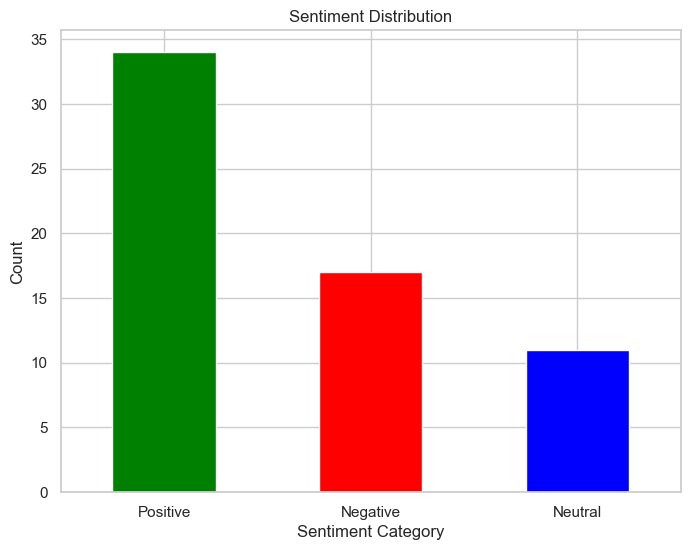

In [175]:
sentiment_counts = df['Sentiment_Label'].value_counts()

colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1) 

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(rotation=0)
plt.show()


In [176]:
import praw
import pandas as pd
from dotenv import load_dotenv
from os import getenv
from datetime import datetime as dt

load_dotenv()

reddit = praw.Reddit(
    client_id=getenv("APP_ID"),
    client_secret=getenv("APP_SECRET"),
    user_agent=f"{getenv('APP_NAME')} u/{getenv('REDDIT_USERNAME')}",
)

# Keyword to search for
keyword = "public transport in "

# Subreddit to search in
subreddit_name = "all"

# Perform the search
subreddit = reddit.subreddit(subreddit_name)
search_results = subreddit.search(keyword, limit=None) 

# Iterate through search results and print post titles and links
for submission in search_results:
    print(f"Title: {submission.title}")
    print(f"Link: {submission.url}")
    print("-" * 50)


Title: Public transport in Argentina 
Link: https://v.redd.it/n7uzzgdfecdb1
--------------------------------------------------
Title: Bloke cries victim on public transport in Melbourne, Australia 
Link: https://v.redd.it/q9evmubrjk4b1
--------------------------------------------------
Title: Public transport in the Himalayas
Link: https://gfycat.com/carelesspertinentindusriverdolphin
--------------------------------------------------
Title: Public transport advice for a tourist
Link: https://www.reddit.com/r/Prague/comments/w7md6a/public_transport_advice_for_a_tourist/
--------------------------------------------------
Title: The Netherlands has second most expensive public transport in the world
Link: https://www.iamexpat.nl/expat-info/dutch-expat-news/dutch-public-transport-system-one-most-expensive-world
--------------------------------------------------
Title: Envy Peru was attacked in public transport in Amsterdam today
Link: https://i.redd.it/zt9wtdl56ebb1.jpg
------------------

Title: Are there ANY places in the U.S with good public transportation?
Link: https://www.reddit.com/r/fuckcars/comments/1701kzu/are_there_any_places_in_the_us_with_good_public/
--------------------------------------------------
Title: /u/OleBenKnobi details the lack of public transportation in America and how people end up driving drunk
Link: https://np.reddit.com/r/dataisbeautiful/comments/48q3w8/the_uber_effect_causes_a_10_drop_of_dui_arrests/d0lr5le
--------------------------------------------------
Title: Study: Public transportation in Boston ranked 2nd best in the country
Link: https://whdh.com/news/study-public-transportation-in-boston-2nd-best-in-the-country/
--------------------------------------------------
Title: Public transport in Switzerland can look like this.
Link: https://i.redd.it/v99y4vwa6s2b1.jpg
--------------------------------------------------
Title: We need more representatives who believe in public transportation!
Link: https://i.redd.it/0s71f1utrnx81.jpg
----

Title: Worried about public transport in Galway
Link: https://www.reddit.com/r/galway/comments/171fnc5/worried_about_public_transport_in_galway/
--------------------------------------------------
Title: Traffic in Lagos, a city of 20M people with virtually no public transportation infrastructure
Link: https://i.redd.it/s20wyf83m3e51.jpg
--------------------------------------------------
Title: Strange Guy in Public Transport
Link: https://www.reddit.com/r/zurich/comments/18ggif5/strange_guy_in_public_transport/
--------------------------------------------------
Title: Why don't YOU use active transport in Perth? Eg. Bike, public transport, walking
Link: https://www.reddit.com/r/perth/comments/16ix11j/why_dont_you_use_active_transport_in_perth_eg/
--------------------------------------------------
Title: public transport in Kingfisher Plaza Likas
Link: https://www.reddit.com/r/Sabah/comments/18vsp5b/public_transport_in_kingfisher_plaza_likas/
--------------------------------------------

In [177]:
# Get the unique identifier for a specific post (copy it from the search results)
submission_id = "155se65"

# Get the specific post
submission = reddit.submission(id=submission_id)


submission.comments.replace_more(limit=None)  # Get comments
comments = submission.comments.list()


In [178]:
from datetime import datetime as dt
comments_list = []
time_list = []

for comment in comments:
    comment_body = comment.body
    comment_time = dt.fromtimestamp(comment.created_utc)
    comments_list.append(comment_body)
    time_list.append(comment_time)
    
df1 = pd.DataFrame({'Comment': comments_list, 'Post Time': time_list})
print(df1)

                                               Comment           Post Time
0    \nu/savevideo u/downloadvideo u/savevideobot\n... 2023-07-21 17:11:13
1               Marilyn Manson has let himself go abit 2023-07-21 17:33:51
2      They fucking clapped, don't know which is worse 2023-07-21 17:44:54
3             Wow the local crackhead has a tiktok now 2023-07-21 17:51:47
4                                         No Aplausos! 2023-07-21 17:22:29
..                                                 ...                 ...
404                                          Chongski! 2023-07-22 13:24:22
405  Drugs, attention starved, a dare. Many things.... 2023-07-21 20:51:33
406  Exactly. And then they get pissy when you call... 2023-07-21 22:07:01
407  Funny part is that there is an actual personal... 2023-07-21 23:53:06
408                                           Palmas!🤣 2023-07-21 23:38:41

[409 rows x 2 columns]


In [179]:
import praw
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk
# Download NLTK's stopwords and word tokenization data
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer and stop words list
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))


# Preprocess comments
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords and perform stemming
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(filtered_words)

df1['Preprocessed Comment'] = df1['Comment'].apply(preprocess_text)

# Print the DataFrame with preprocessed comments
print(df1)

                                               Comment           Post Time  \
0    \nu/savevideo u/downloadvideo u/savevideobot\n... 2023-07-21 17:11:13   
1               Marilyn Manson has let himself go abit 2023-07-21 17:33:51   
2      They fucking clapped, don't know which is worse 2023-07-21 17:44:54   
3             Wow the local crackhead has a tiktok now 2023-07-21 17:51:47   
4                                         No Aplausos! 2023-07-21 17:22:29   
..                                                 ...                 ...   
404                                          Chongski! 2023-07-22 13:24:22   
405  Drugs, attention starved, a dare. Many things.... 2023-07-21 20:51:33   
406  Exactly. And then they get pissy when you call... 2023-07-21 22:07:01   
407  Funny part is that there is an actual personal... 2023-07-21 23:53:06   
408                                           Palmas!🤣 2023-07-21 23:38:41   

                                  Preprocessed Comment  
0    u

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luozh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luozh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [180]:
# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on comments and add sentiment polarity to the DataFrame
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment['compound']  # The 'compound' value represents the overall sentiment polarity

df1['Sentiment'] = df1['Comment'].apply(analyze_sentiment)

# Print the DataFrame with sentiment analysis results
print(df1)


                                               Comment           Post Time  \
0    \nu/savevideo u/downloadvideo u/savevideobot\n... 2023-07-21 17:11:13   
1               Marilyn Manson has let himself go abit 2023-07-21 17:33:51   
2      They fucking clapped, don't know which is worse 2023-07-21 17:44:54   
3             Wow the local crackhead has a tiktok now 2023-07-21 17:51:47   
4                                         No Aplausos! 2023-07-21 17:22:29   
..                                                 ...                 ...   
404                                          Chongski! 2023-07-22 13:24:22   
405  Drugs, attention starved, a dare. Many things.... 2023-07-21 20:51:33   
406  Exactly. And then they get pissy when you call... 2023-07-21 22:07:01   
407  Funny part is that there is an actual personal... 2023-07-21 23:53:06   
408                                           Palmas!🤣 2023-07-21 23:38:41   

                                  Preprocessed Comment  Sentime

In [181]:
def classify_sentiment(compound_score, pos_threshold=0.05, neg_threshold=-0.05):
    if compound_score >= pos_threshold:
        return "Positive"
    elif compound_score <= neg_threshold:
        return "Negative"
    else:
        return "Neutral"

df1['Sentiment_Label'] = df1['Sentiment'].apply(classify_sentiment)

print(df1)

                                               Comment           Post Time  \
0    \nu/savevideo u/downloadvideo u/savevideobot\n... 2023-07-21 17:11:13   
1               Marilyn Manson has let himself go abit 2023-07-21 17:33:51   
2      They fucking clapped, don't know which is worse 2023-07-21 17:44:54   
3             Wow the local crackhead has a tiktok now 2023-07-21 17:51:47   
4                                         No Aplausos! 2023-07-21 17:22:29   
..                                                 ...                 ...   
404                                          Chongski! 2023-07-22 13:24:22   
405  Drugs, attention starved, a dare. Many things.... 2023-07-21 20:51:33   
406  Exactly. And then they get pissy when you call... 2023-07-21 22:07:01   
407  Funny part is that there is an actual personal... 2023-07-21 23:53:06   
408                                           Palmas!🤣 2023-07-21 23:38:41   

                                  Preprocessed Comment  Sentime

In [182]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object
vectorizer = CountVectorizer()
# Convert the text data into a Bag of Words (BoW) feature matrix
X_bow = vectorizer.fit_transform(df1['Preprocessed Comment'])


In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()
# Convert the text data into a TF-IDF feature matrix
X_tfidf = tfidf_vectorizer.fit_transform(df1['Preprocessed Comment'])


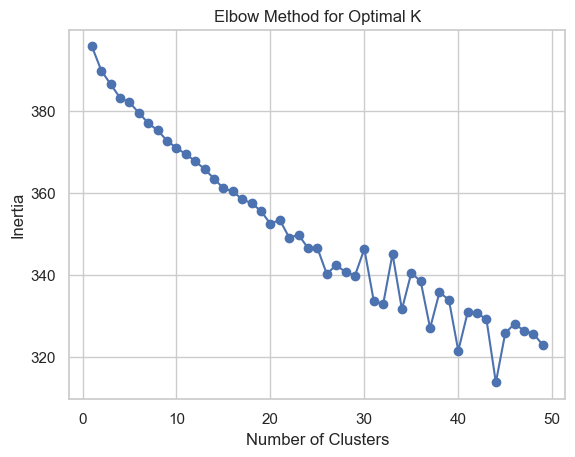

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create K-means models for different numbers of clusters and calculate the inertia
inertia = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 50), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


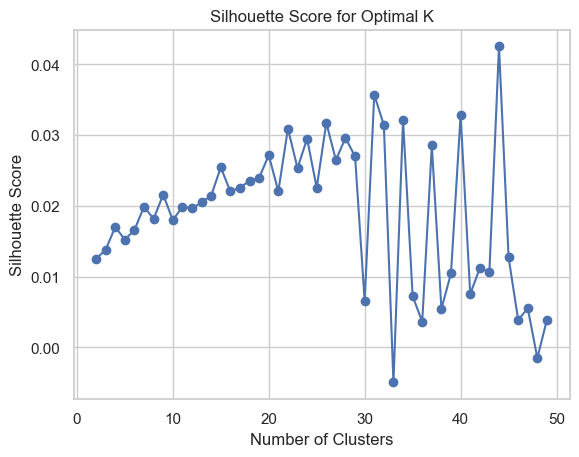

In [185]:
from sklearn.metrics import silhouette_score

# Create K-means models for different numbers of clusters and calculate silhouette scores
silhouette_scores = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tfidf)
    silhouette_scores.append(silhouette_score(X_tfidf, cluster_labels))


plt.plot(range(2, 50), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


In [186]:
from sklearn.cluster import KMeans
# Create a K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model and get cluster labels for each text
cluster_labels = kmeans.fit_predict(X_tfidf)

print(cluster_labels)

df1['Cluster'] = cluster_labels
print(df1)


[0 1 2 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 2 1 0 0 1 2 0 0 1 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0
 0 2 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0
 1 2 0 2 0 0 2 0 0 2 0 0 2 0 1 0 0 0 0 1 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 2 0 2 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 2 0 0 2 0 1 0 0 1 1
 0 0 0 1 1 0 1 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0
 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 1 0 0 0 0 0 0 0
 0 0]
                                               Comment           Post Time  \
0    \nu/savevideo u/downloadvideo u/savevideobot\n... 2023-07-21 17:11:13   
1            

In [187]:
from sklearn.decomposition import LatentDirichletAllocation
# Create an LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
# Train the model and obtain the topic distribution for the texts
topic_distribution = lda.fit_transform(X_tfidf)
# Output the top few keywords for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
n_top_words = 5
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")


Topic 0: marilyn, clap, manson, like, look
Topic 1: clap, one, cring, right, girl
Topic 2: wtf, die, bigot, languag, crackhead
Topic 3: fuck, clap, meth, real, usavevideobot
Topic 4: caus, good, palma, eeeew, knobhead
Topic 5: drug, love, clap, video, helluva
Topic 6: kid, drug, say, dont, need
Topic 7: aplauso, that, dont, dude, long
Topic 8: pleas, clap, lol, sure, actual
Topic 9: ew, bad, argentina, everyon, feel


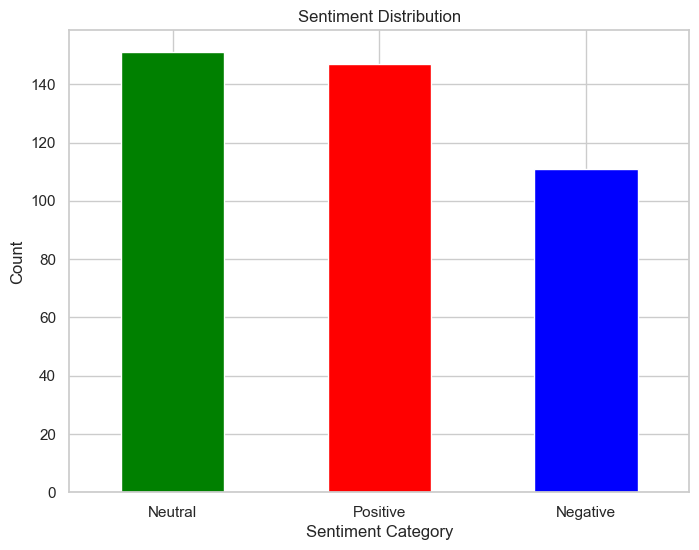

In [188]:
# Count the number of each sentiment category
sentiment_counts = df1['Sentiment_Label'].value_counts()
# Set plotting parameters
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)  # Offset to highlight a specific sentiment category

# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(rotation=0)
plt.show()


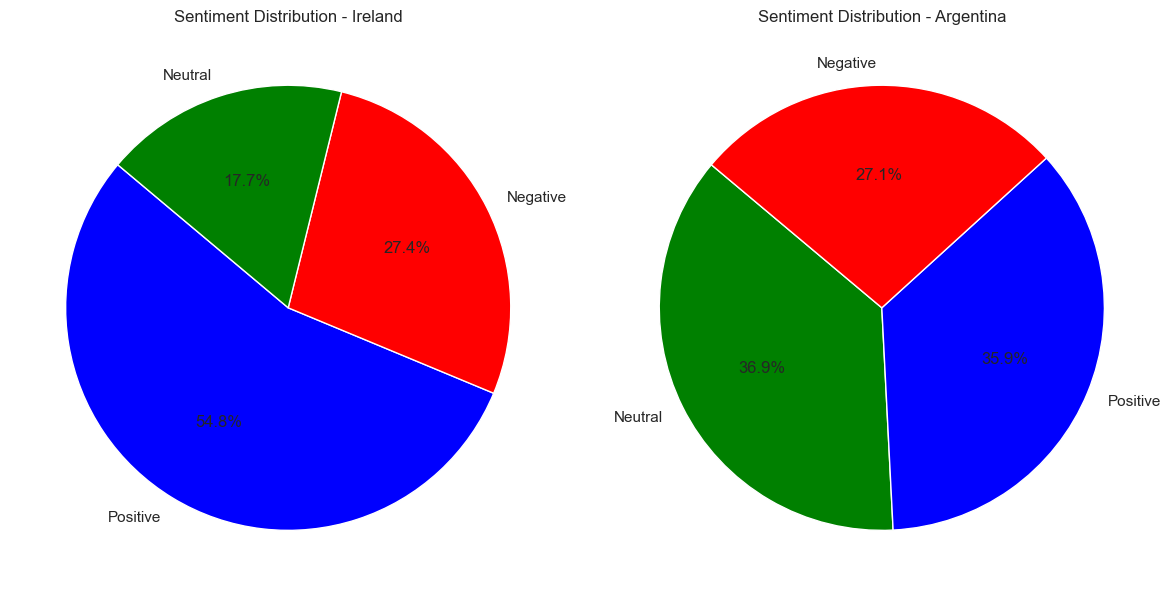

In [189]:
import matplotlib.pyplot as plt

# Define a color dictionary for sentiment categories
color_dict = {'Neutral': 'green', 'Positive': 'blue', 'Negative': 'red'}

# Assume df and df1 are two DataFrames containing sentiment analysis results
# Count the number of each sentiment category
sentiment_counts_ireland = df['Sentiment_Label'].value_counts()
sentiment_counts_argentina = df1['Sentiment_Label'].value_counts()

# Calculate the proportions of sentiment categories
total_ireland = len(df)
total_argentina = len(df1)
sentiment_proportions_ireland = sentiment_counts_ireland / total_ireland
sentiment_proportions_argentina = sentiment_counts_argentina / total_argentina

# Set plotting parameters with consistent colors
labels = sentiment_proportions_ireland.index
labels_argentina = sentiment_proportions_argentina.index

# Create two subplots, one for Ireland and one for Argentina
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for Ireland with consistent colors
ireland_colors = [color_dict[label] for label in labels]
ax1.pie(sentiment_proportions_ireland, labels=labels, colors=ireland_colors, autopct='%1.1f%%', startangle=140)
ax1.set_title("Sentiment Distribution - Ireland")

# Plot the pie chart for Argentina with consistent colors
argentina_colors = [color_dict[label] for label in labels_argentina]
ax2.pie(sentiment_proportions_argentina, labels=labels_argentina, colors=argentina_colors, autopct='%1.1f%%', startangle=140)
ax2.set_title("Sentiment Distribution - Argentina")

# Adjust the distance between subplots
plt.tight_layout()

# Show the plots
plt.show()
